In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
dosya_yolu = '/content/drive/MyDrive/finaldata.csv'
df = pd.read_csv(dosya_yolu)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Keşifçi Veri Analizi


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
def display_dataframe_info(df):
    print("----- Head of DataFrame -----")
    print(df.head())
    print("\n----- Tail of DataFrame -----")
    print(df.tail())
    print("\n----- Shape of DataFrame -----")
    print(df.shape)
    print("\n----- DataFrame Info -----")
    print(df.info())
    print("\n----- DataFrame Columns -----")
    print(df.columns)
    print("\n----- DataFrame Index -----")
    print(df.index)
    print("\n----- DataFrame Description -----")
    print(df.describe().T)
    print("\n----- Are there any missing values? -----")
    print(df.isnull().values.any())
    print("\n----- Sum of Missing Values by Column -----")
    print(df.isnull().sum())

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols
num_cols
cat_but_car

Observations: 1470
Variables: 35
cat_cols: 21
num_cols: 14
cat_but_car: 0
num_but_cat: 12


[]

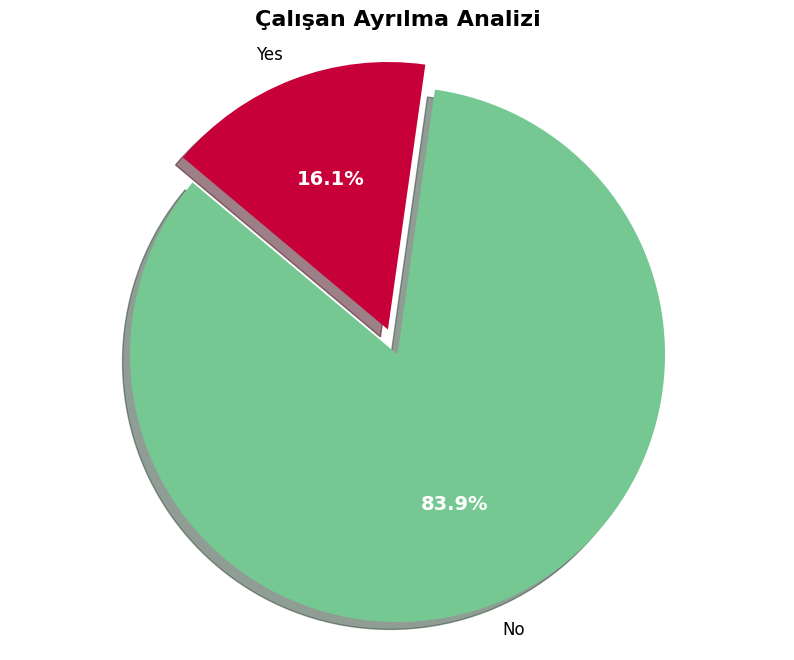

In [ ]:
import matplotlib.pyplot as plt

attrition_counts = df['Attrition'].value_counts()
labels = attrition_counts.index
sizes = attrition_counts.values


colors = ['#76c893', '#c70039']

plt.figure(figsize=(10, 8))


explode = [0.1 if i == 1 else 0 for i in range(len(sizes))]
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12, 'color': 'black'}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_weight('bold')


plt.title('Çalışan Ayrılma Analizi', fontsize=16, fontweight='bold')

plt.axis('equal')

plt.savefig("calisan_ayrilma_analizi.png", dpi=300, bbox_inches='tight')

plt.show()



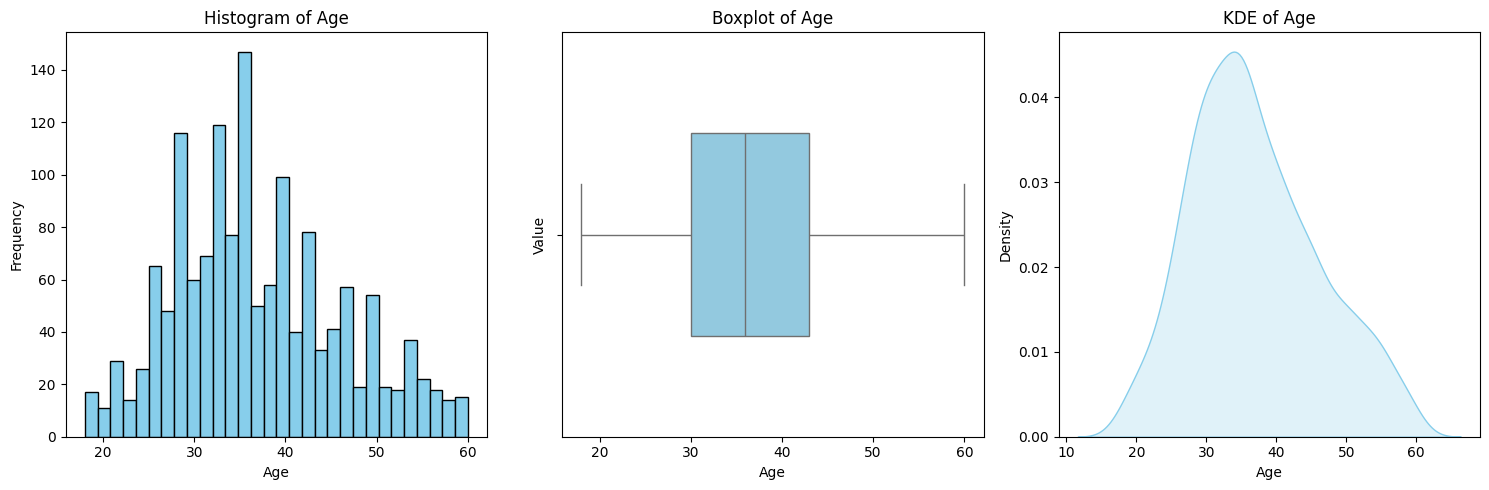

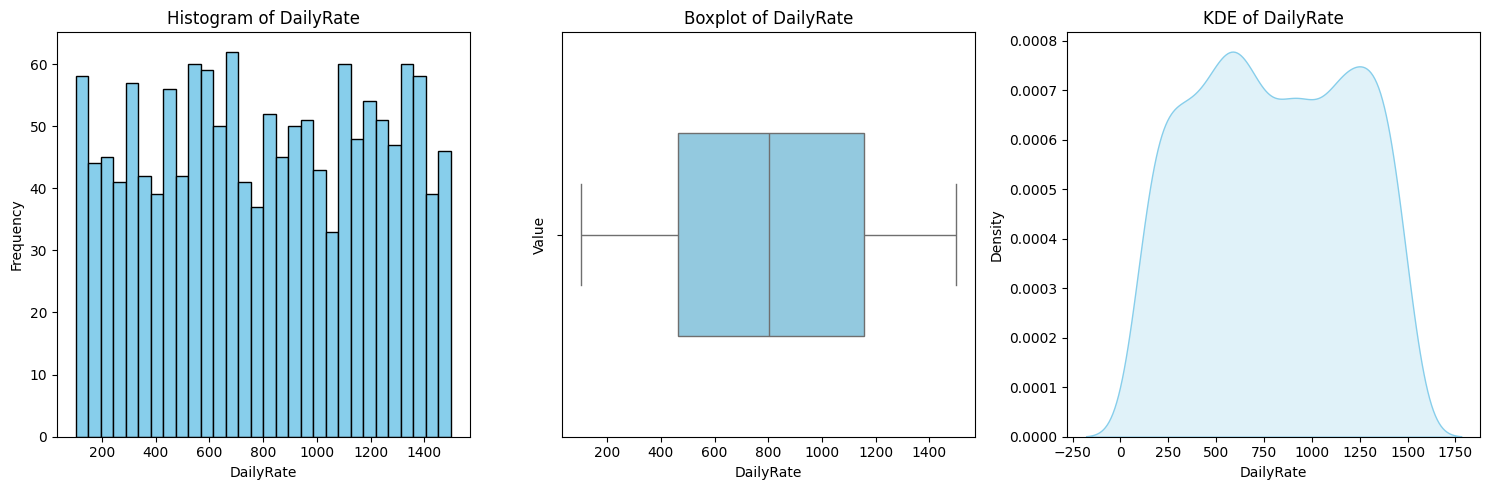

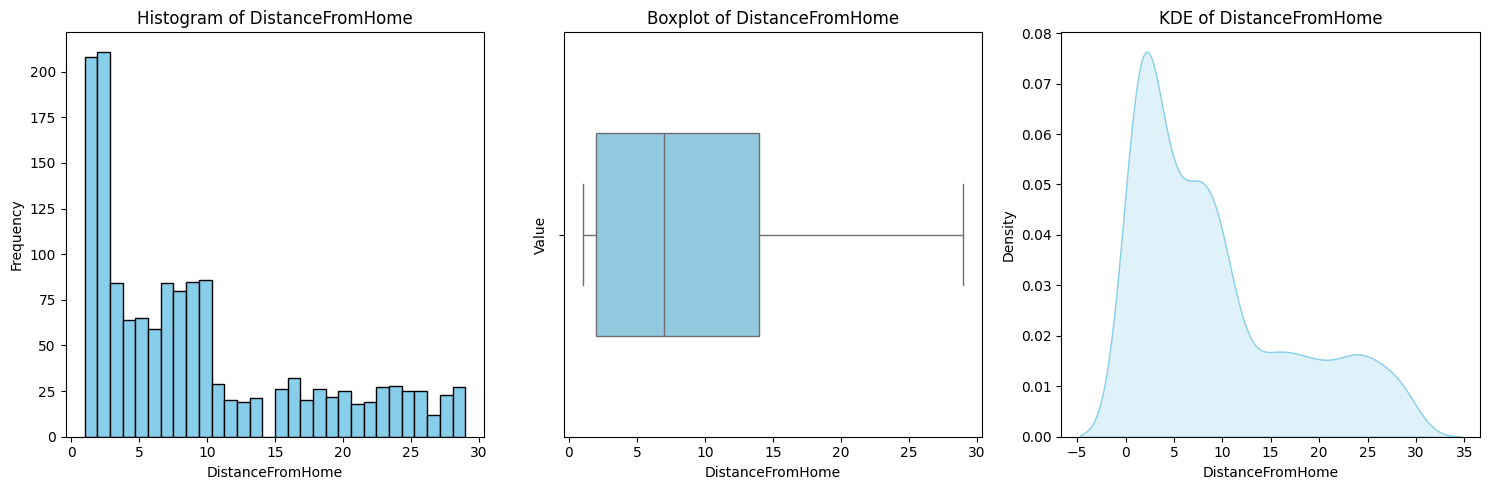

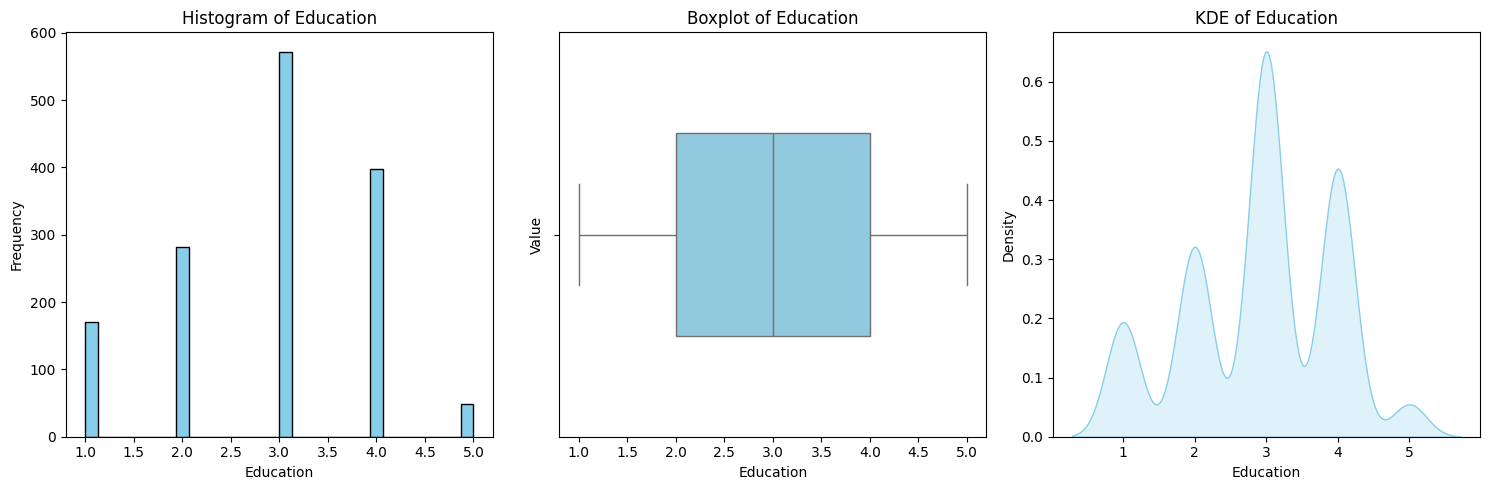

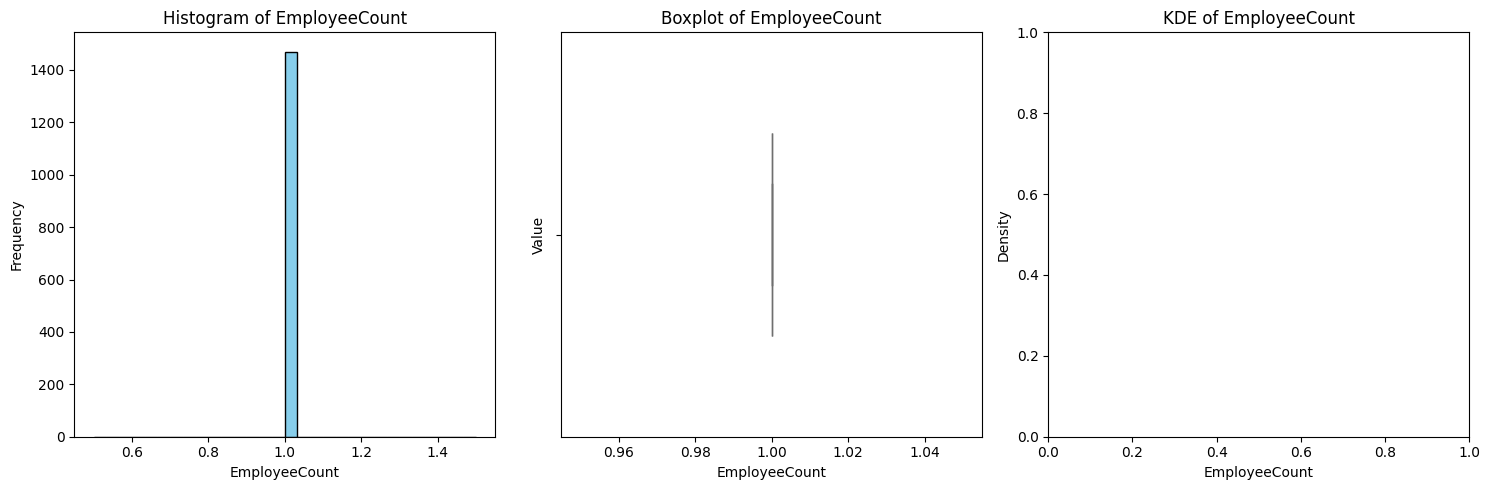

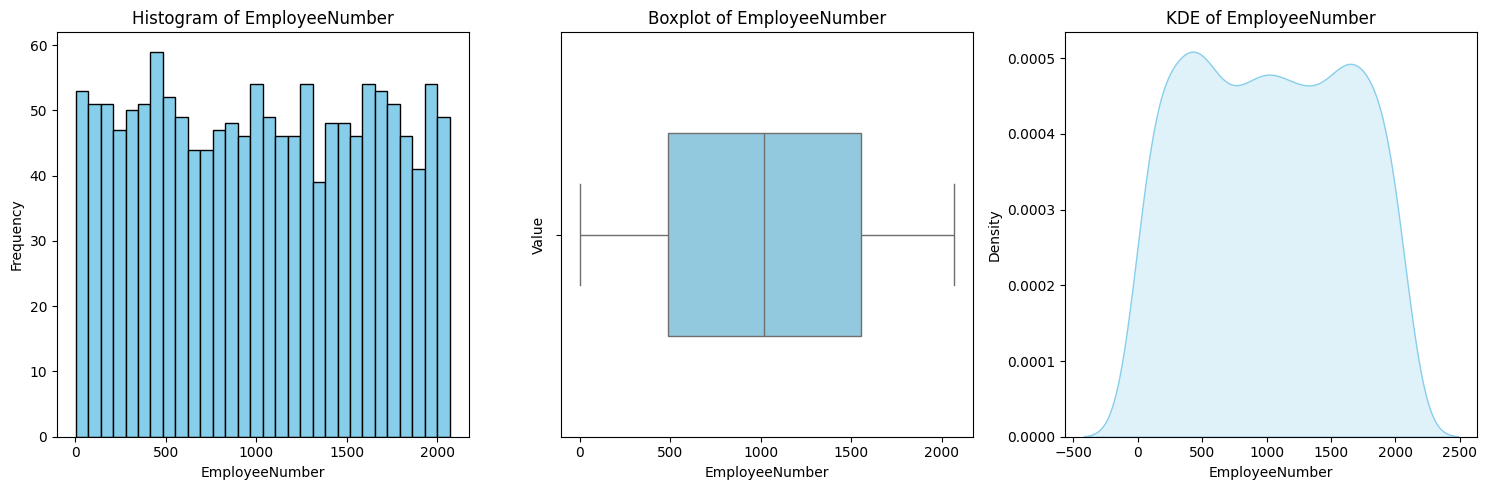

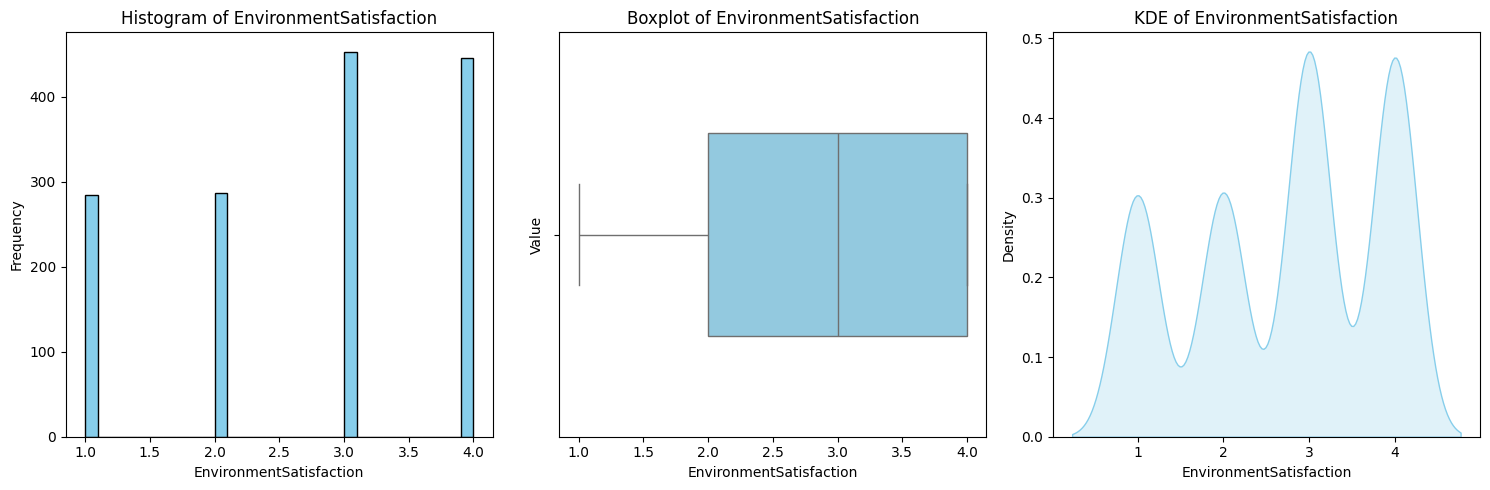

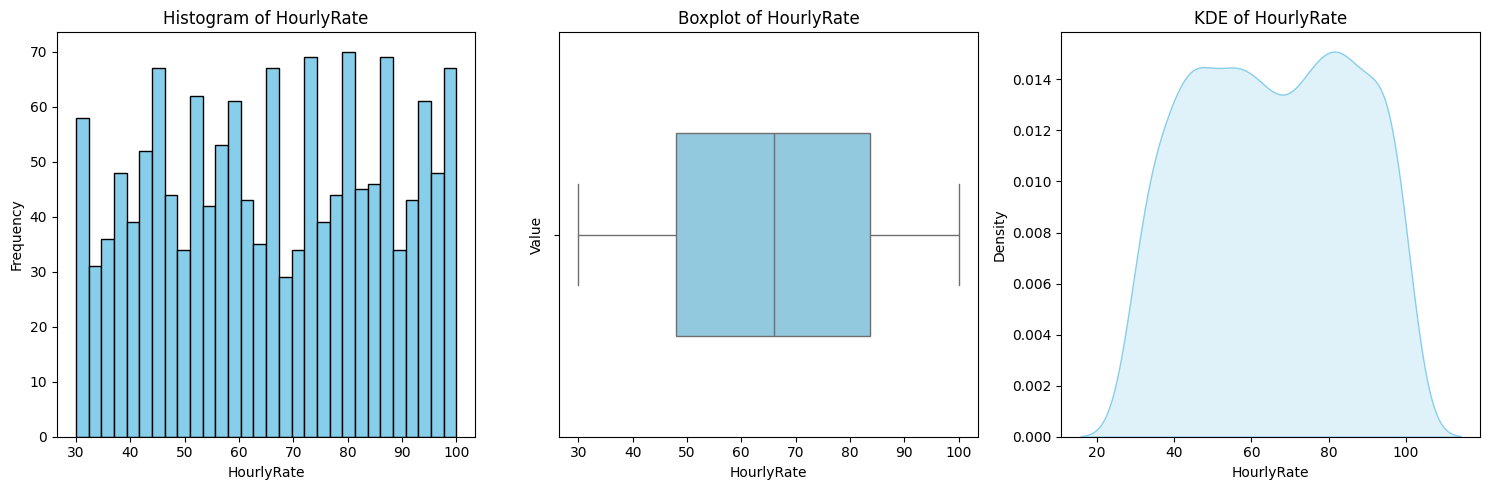

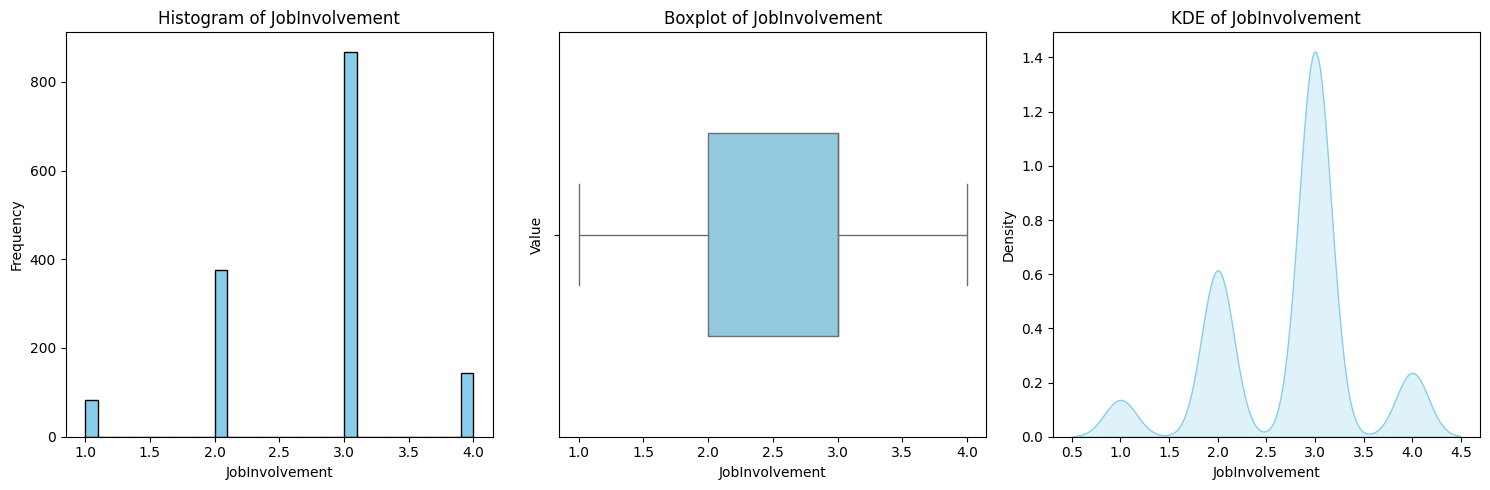

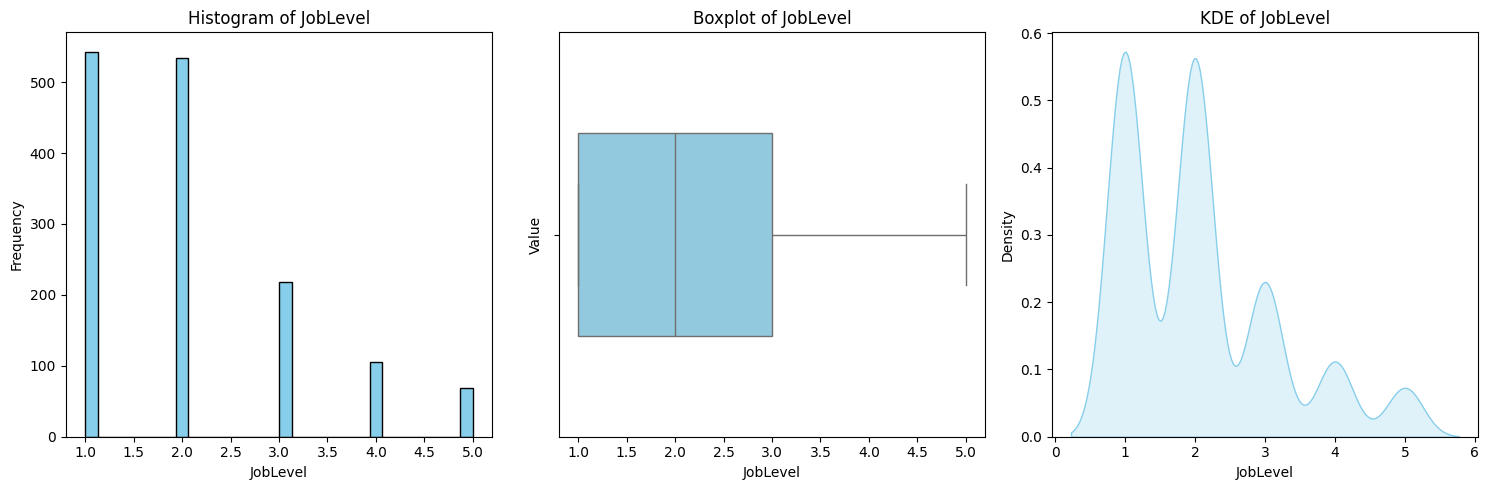

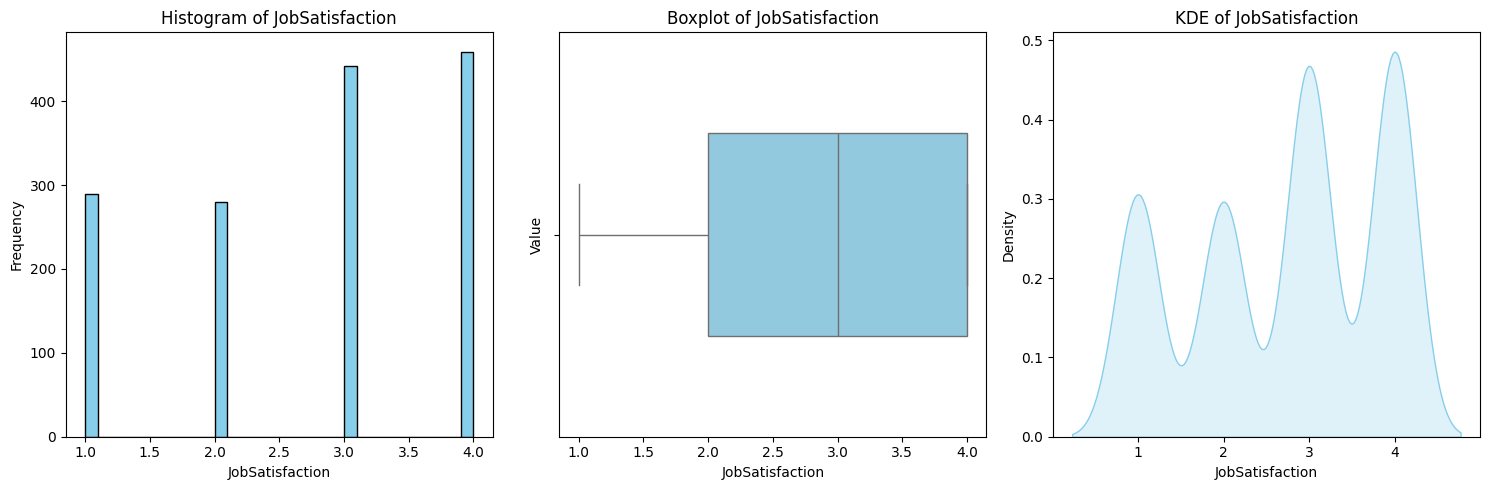

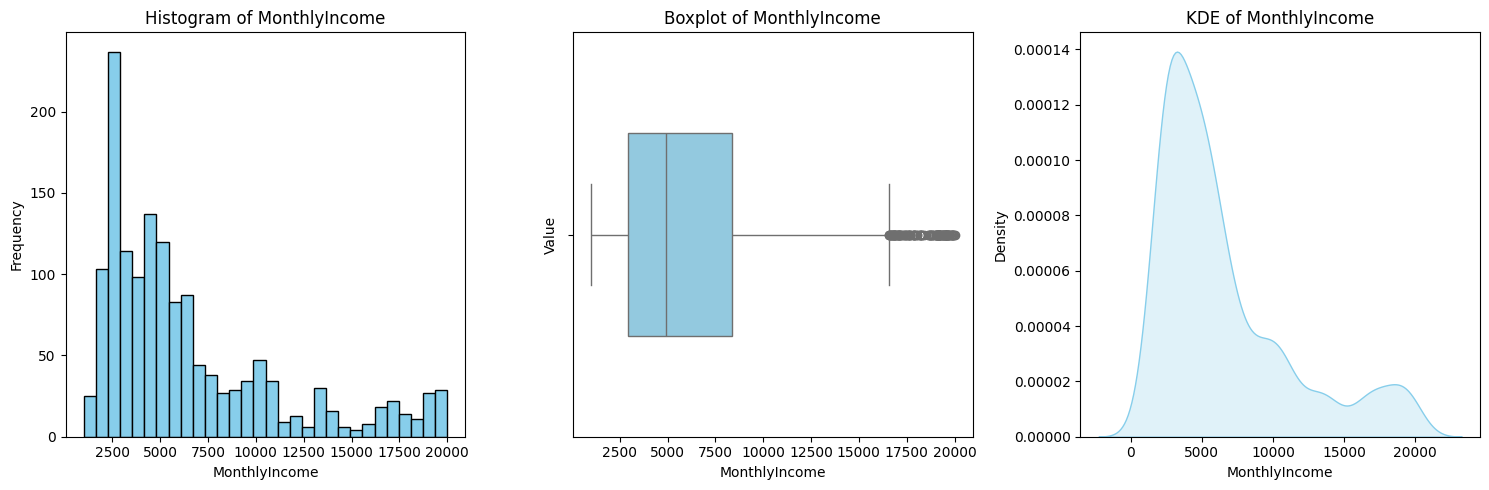

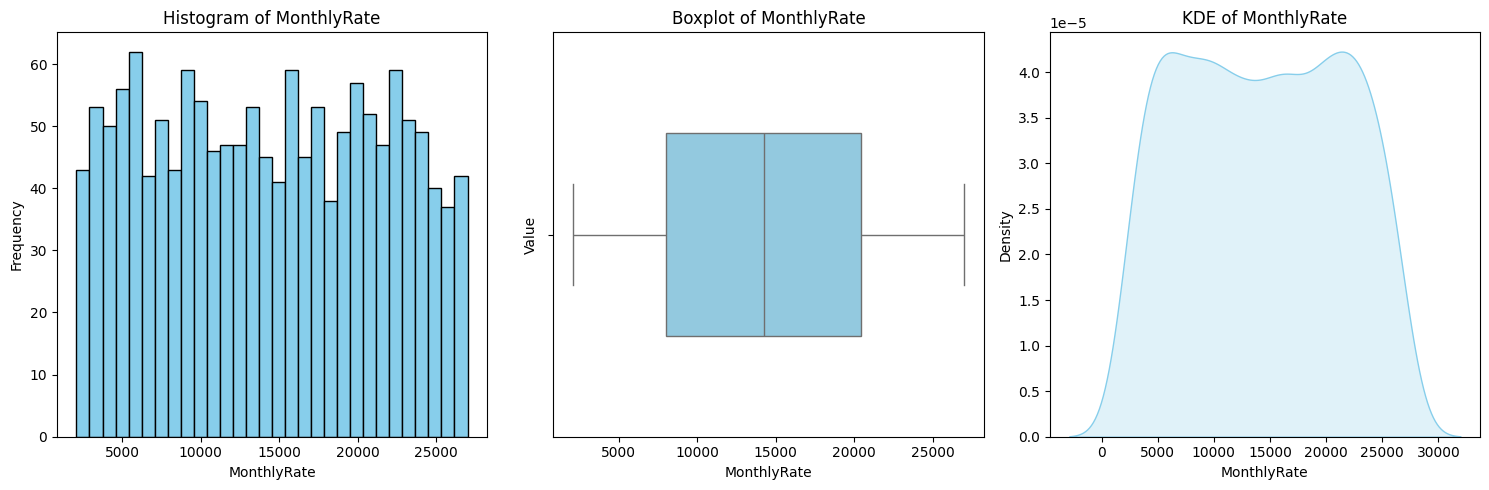

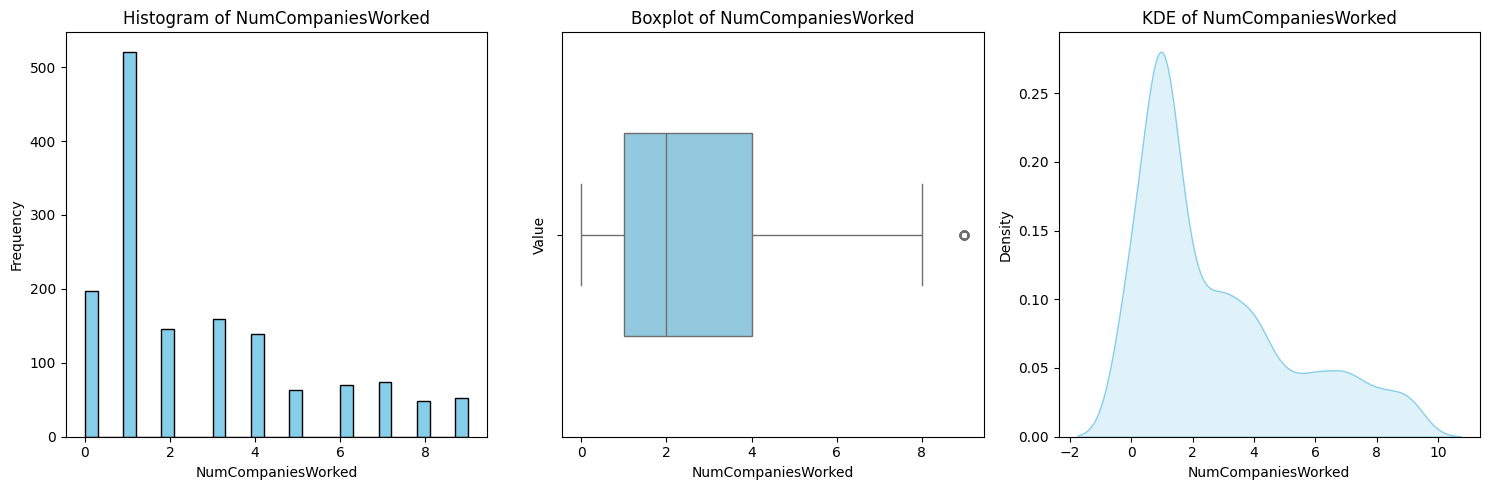

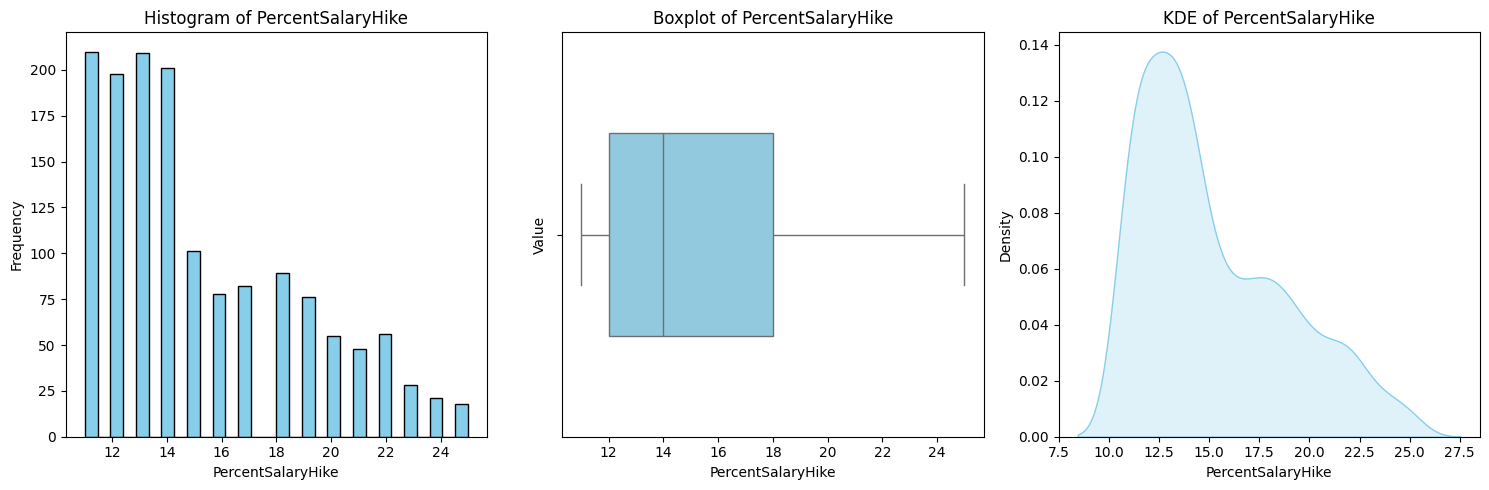

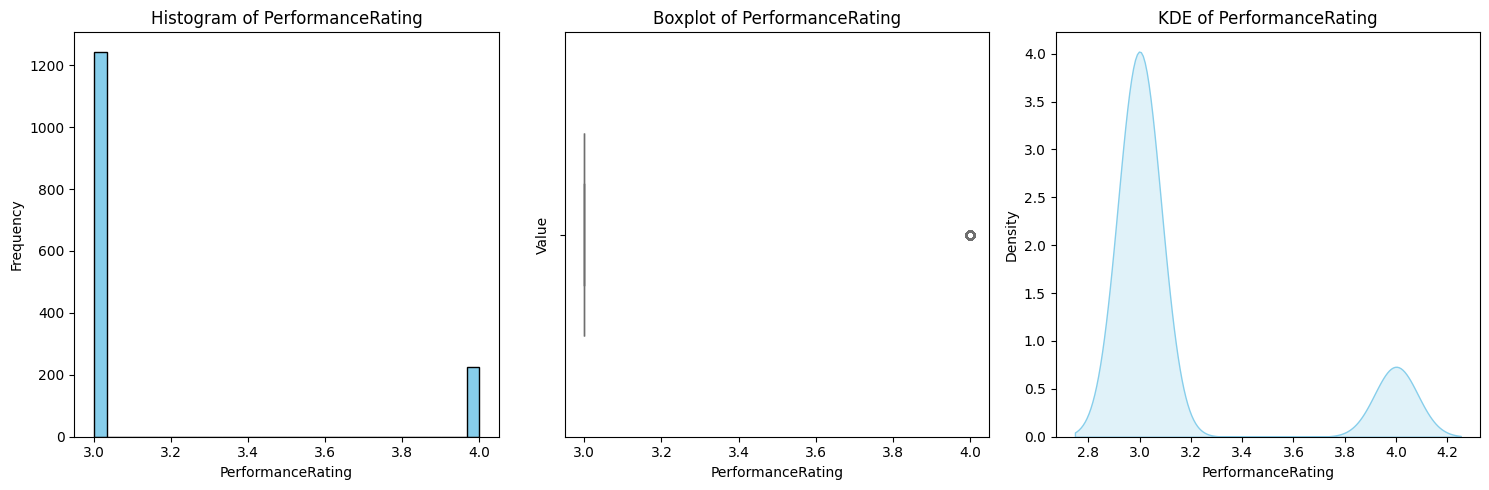

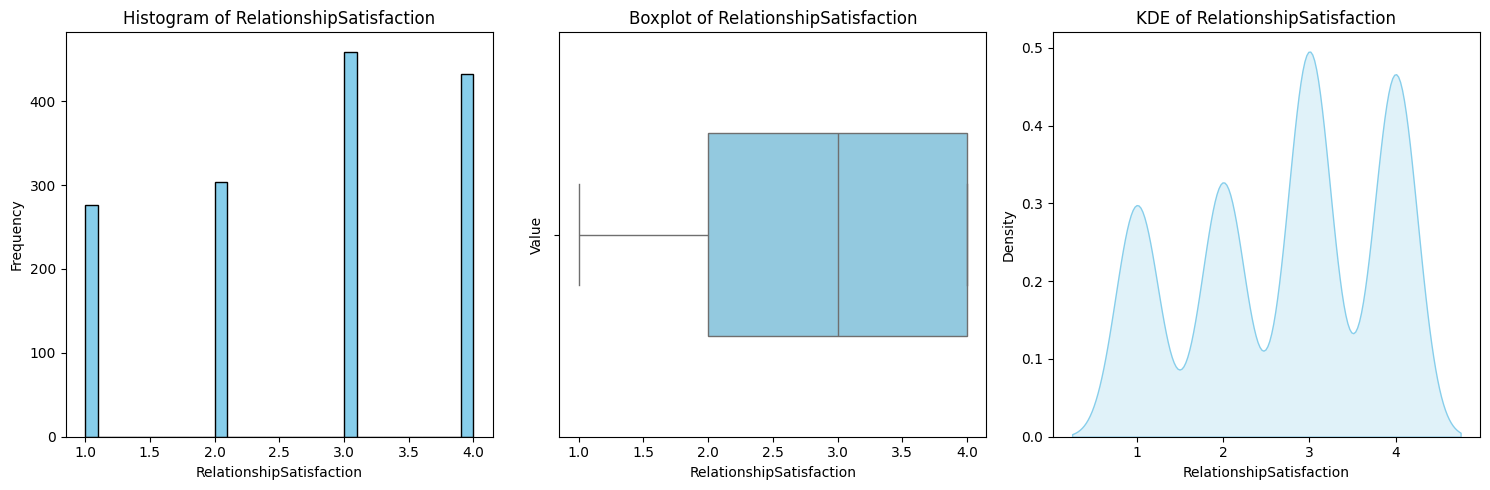

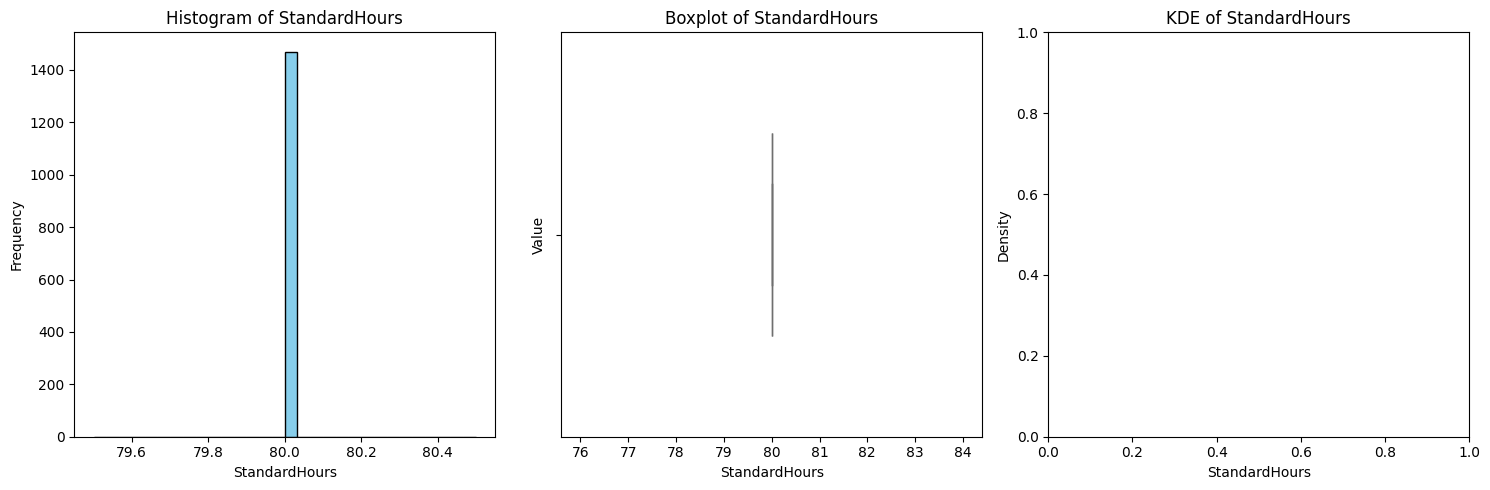

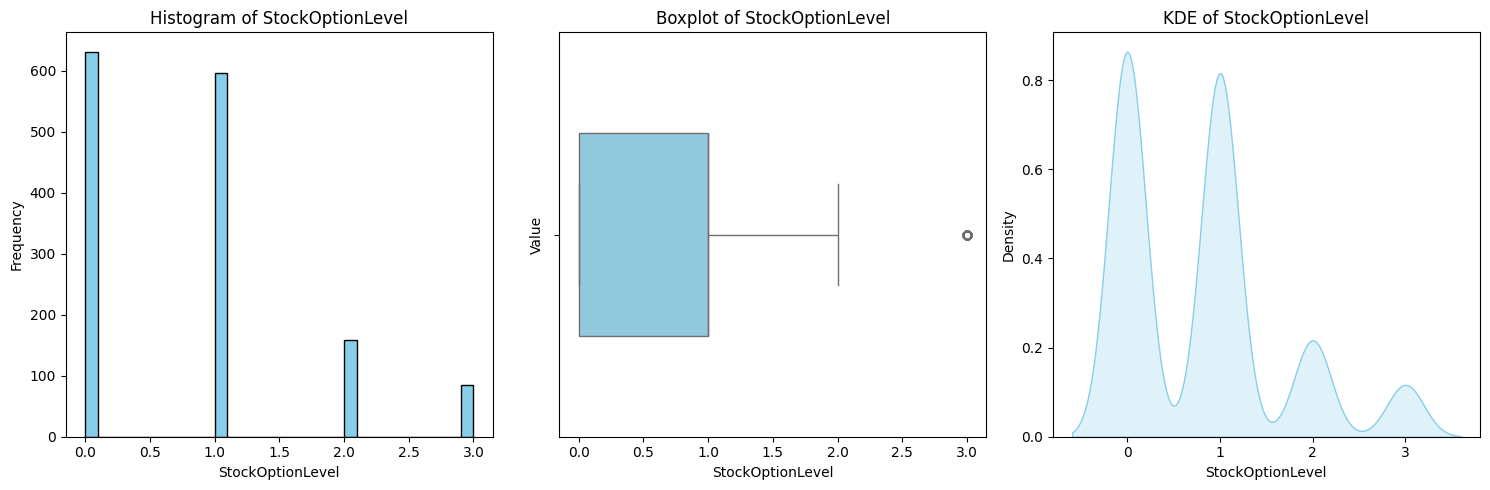

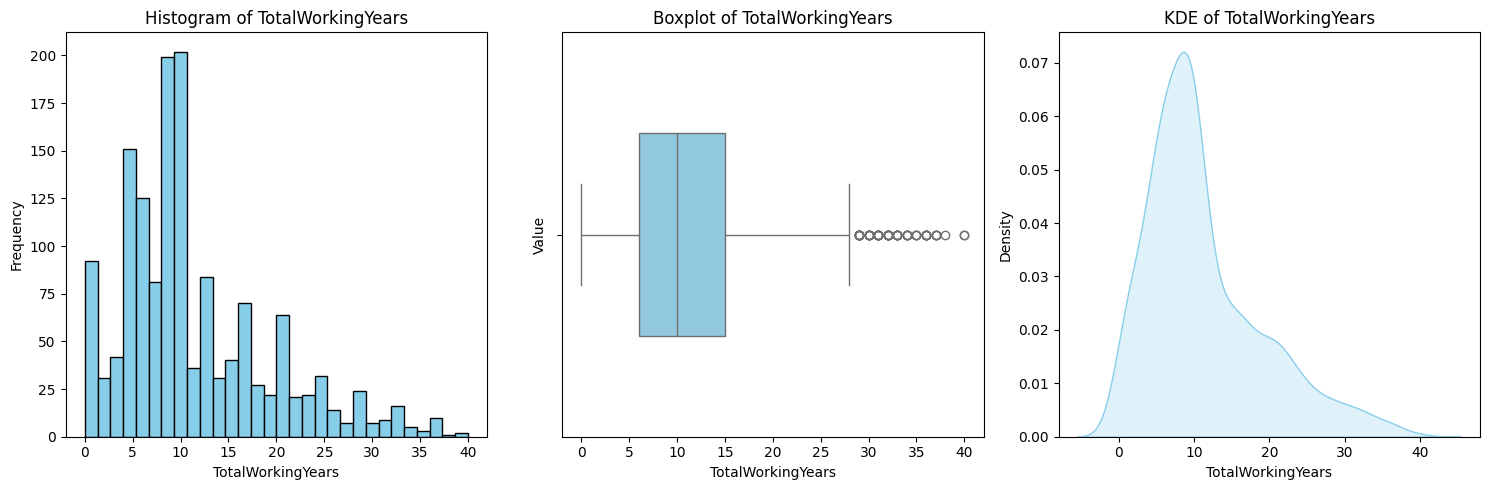

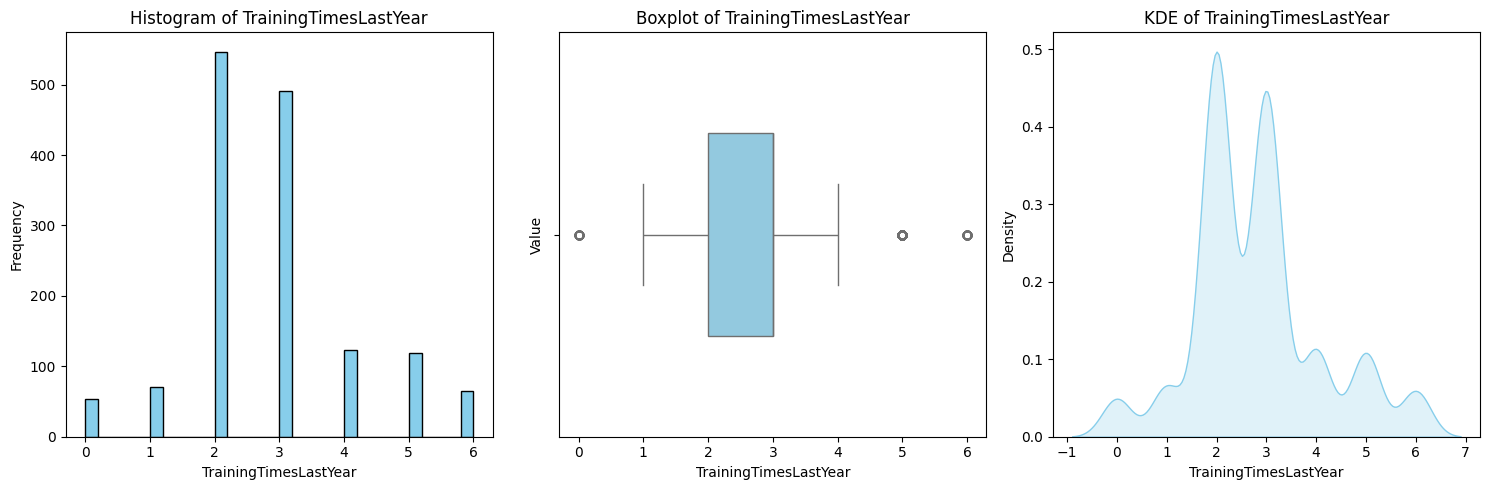

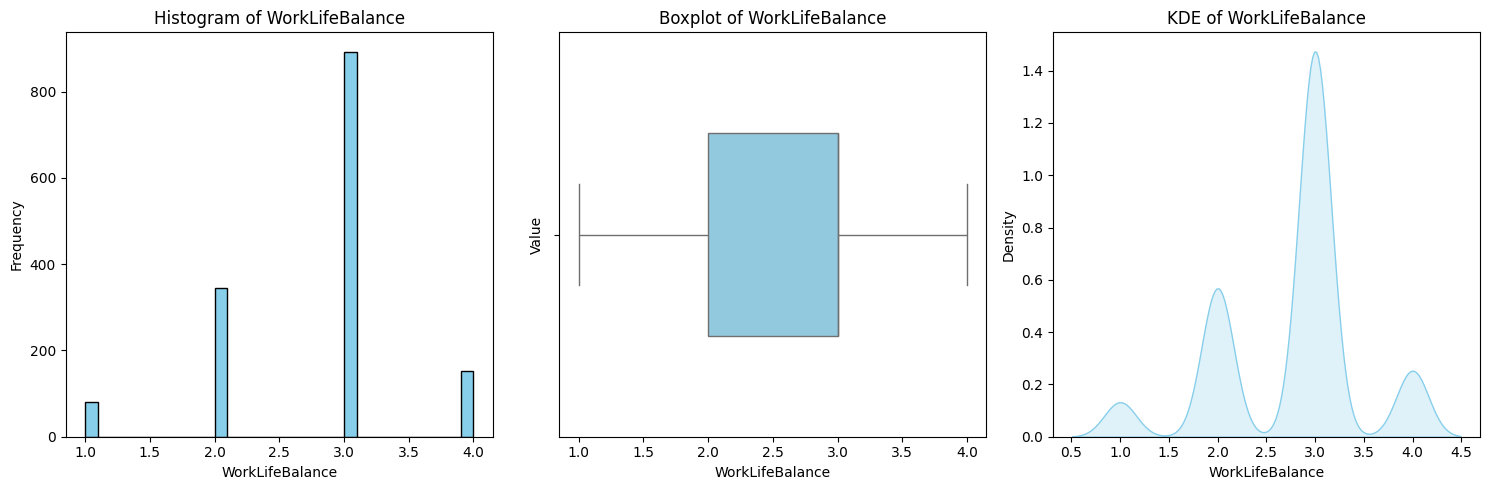

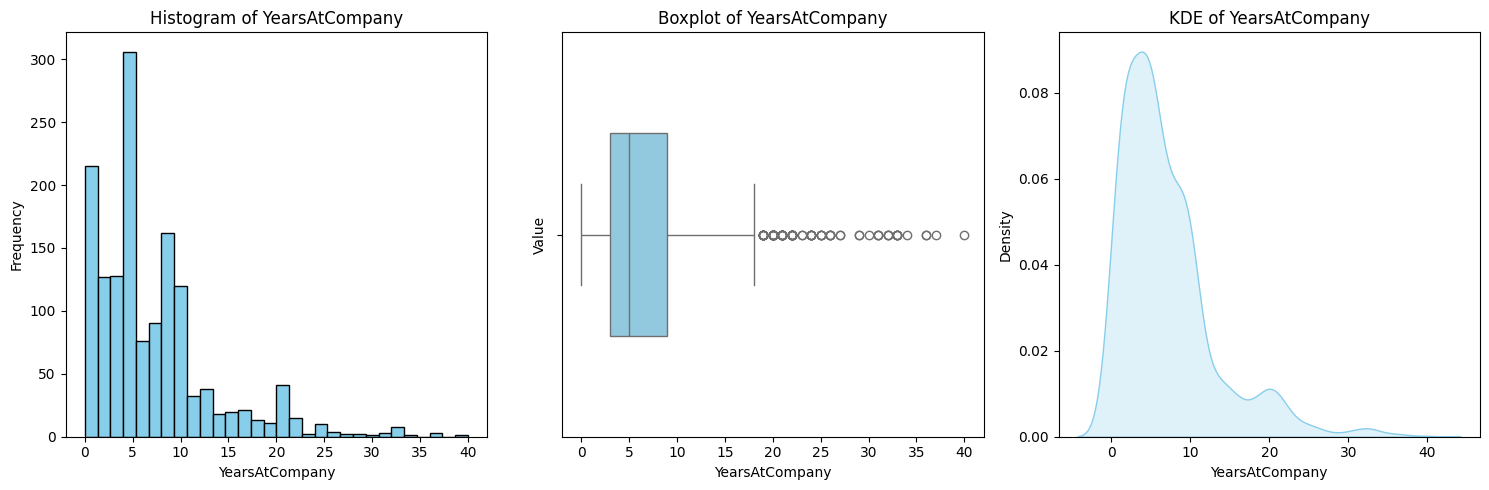

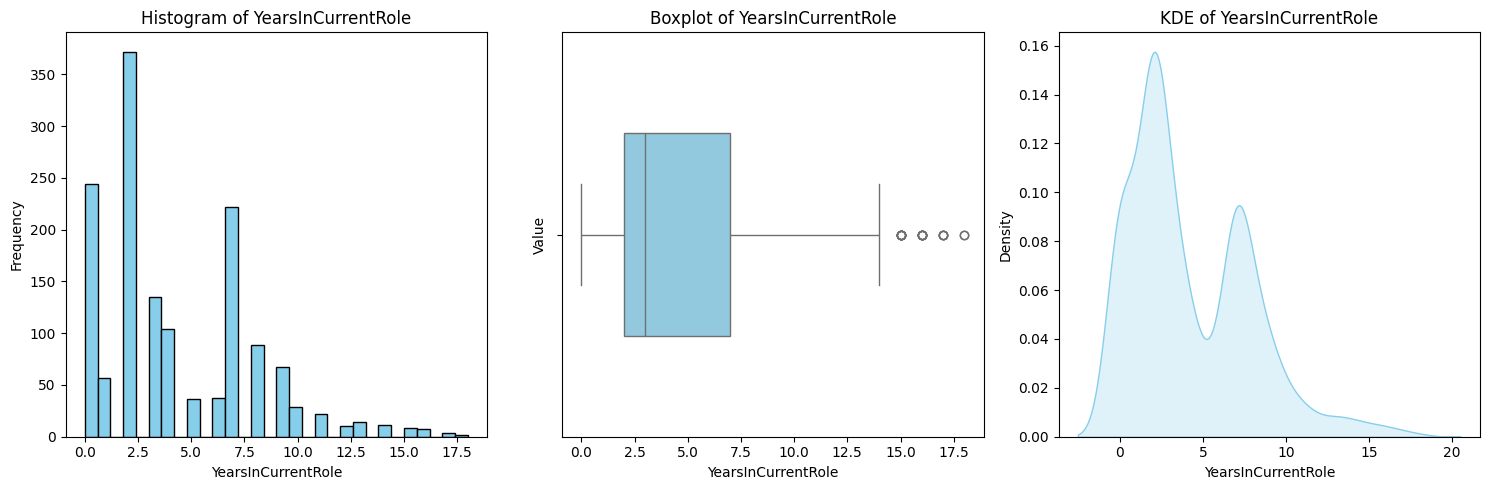

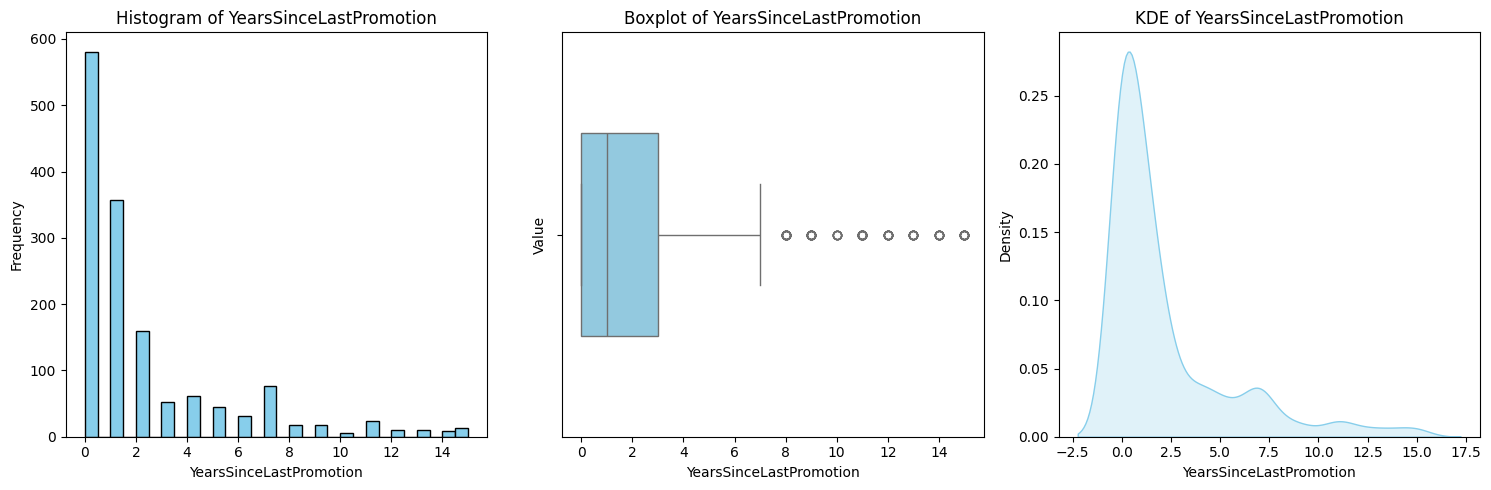

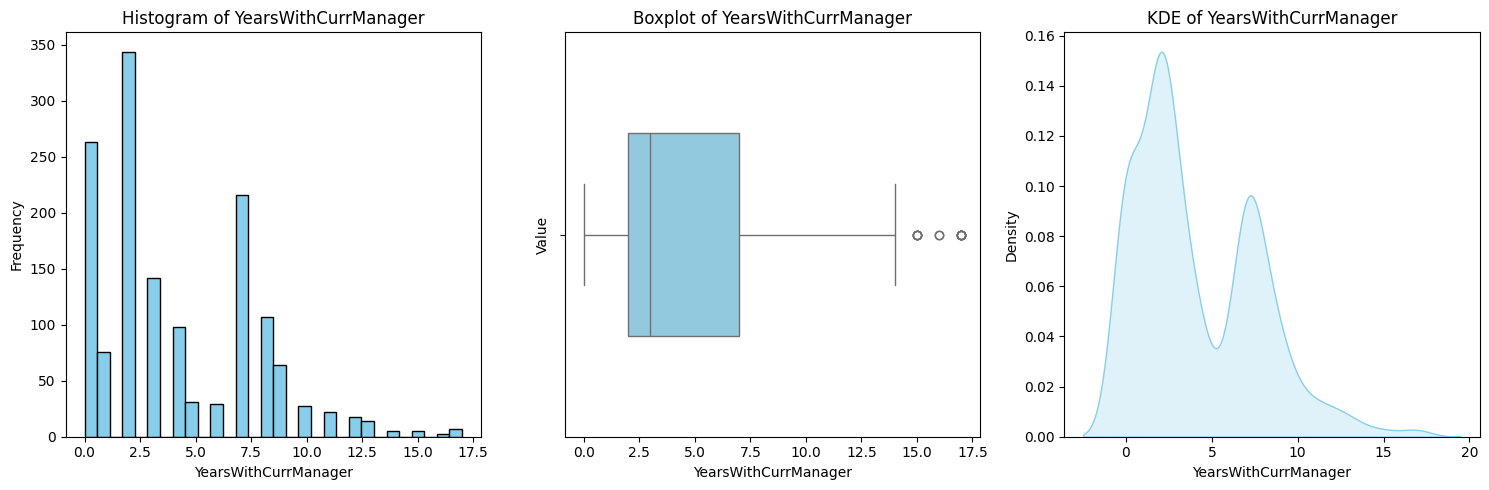

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
numerical_data = df[num_cols]
for col in numerical_data[1:]:
    plt.figure(figsize=(15, 5))


    plt.subplot(1, 3, 1)
    df[col].plot.hist(bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')


    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col],color='skyblue', width=0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')


    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col], color='skyblue', fill=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE of {col}')

    plt.tight_layout()
    plt.show()

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings


from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from scipy.stats import skew


import plotly.express as px
import plotly.graph_objects as go
import math
from plotly.subplots import make_subplots
from numpy import linalg as LA

from sklearn.feature_selection import RFE


from sklearn.model_selection import train_test_split


from sklearn.svm import SVC


from sklearn.utils import resample


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier



warnings.filterwarnings('ignore')

In [ ]:
import plotly.express as px


colors = ['#636EFA', '#EF553B']


fig = px.histogram(df, x='Age', color='Attrition', barmode='group',
                   nbins=20, title='Attrition by Age', color_discrete_sequence=colors)


fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title=dict(
        text='Yaşa Göre İşten Ayrılma Durumu',
        font=dict(size=24, color='black'),
        x=0.5
    ),
    xaxis=dict(
        tickfont=dict(size=12),
        titlefont=dict(size=16),
        gridcolor='lightgrey',
    ),
    yaxis=dict(
        tickfont=dict(size=12),
        titlefont=dict(size=16),
        gridcolor='lightgrey',
    ),
    plot_bgcolor='white',
    margin=dict(t=80, b=50, l=50, r=50),
    legend=dict(
        title='Attrition',
        font=dict(size=12),
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='center',
        x=0.5
    )
)


fig.show()

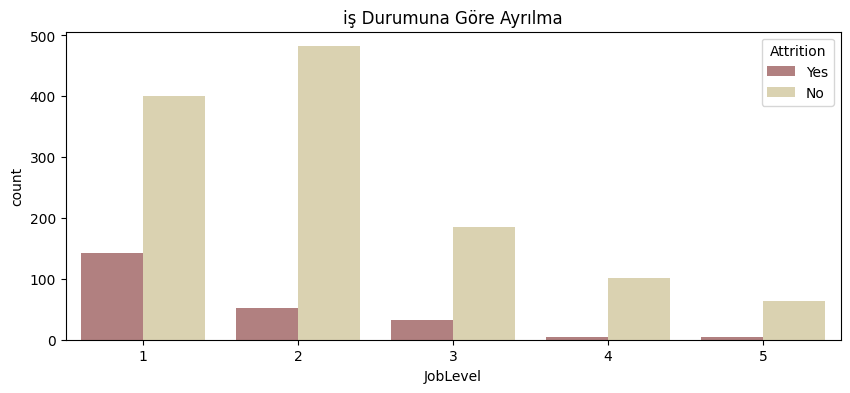

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="JobLevel", hue="Attrition", data=df, palette='pink')
plt.title("iş Durumuna Göre Ayrılma")
plt.show()

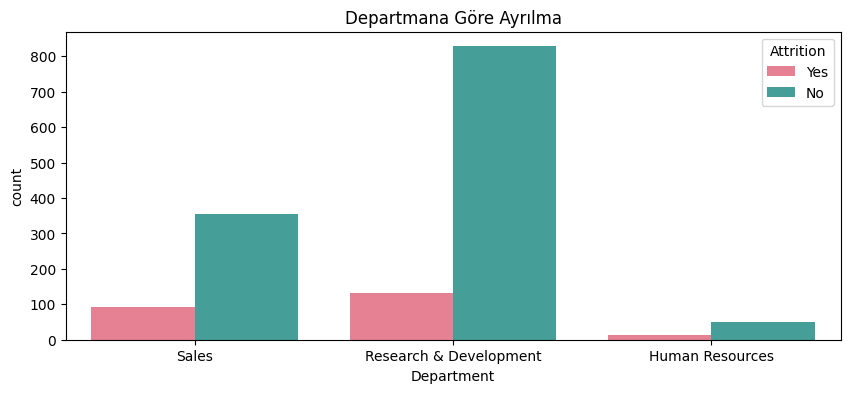

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="Department", hue="Attrition", data=df, palette ='husl')
plt.title("Departmana Göre Ayrılma")
plt.show()

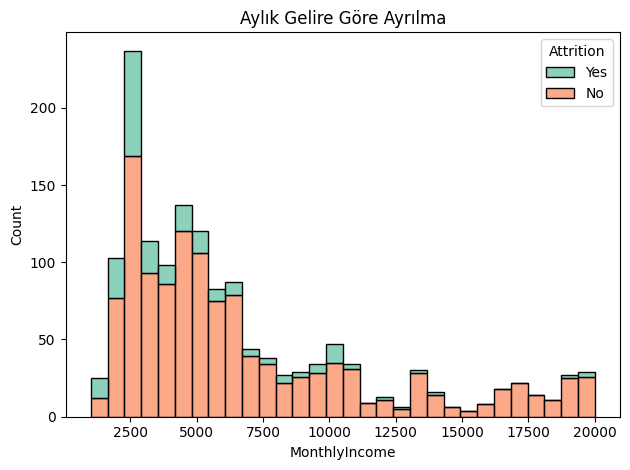

In [ ]:
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', multiple='stack', bins=30, palette='Set2')
plt.title('Aylık Gelire Göre Ayrılma')

plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

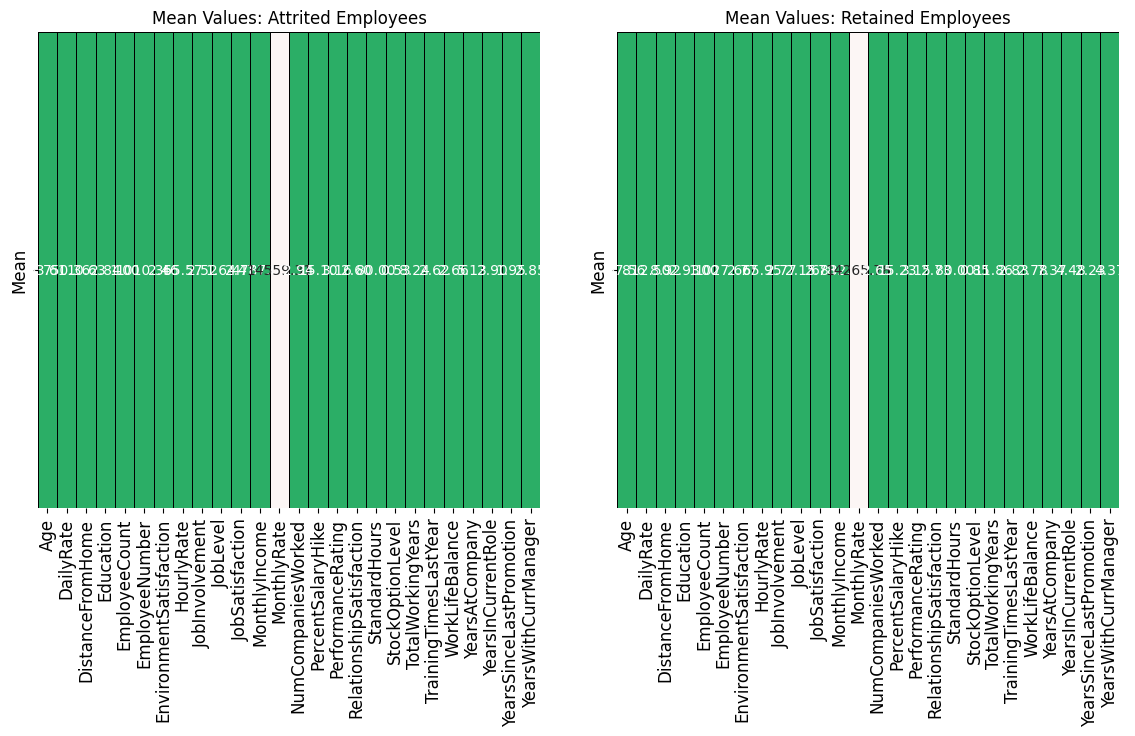

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


yes_mean = df[df['Attrition'] == 'Yes'][numeric_columns].mean()
no_mean = df[df['Attrition'] == 'No'][numeric_columns].mean()

means = pd.DataFrame({
    'Attrited Employees': yes_mean,
    'Retained Employees': no_mean
}).T


colors = ['#2BAE66','#FCF6F5']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))


sns.heatmap(yes_mean.values.reshape(1, -1), annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[0])
ax[0].set_xticklabels(yes_mean.index, fontsize=12, rotation=90)  #
ax[0].set_yticklabels(['Mean'], fontsize=12)
ax[0].set_title('Mean Values: Attrited Employees')


sns.heatmap(no_mean.values.reshape(1, -1), annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[1])
ax[1].set_xticklabels(no_mean.index, fontsize=12, rotation=90)
ax[1].set_yticklabels(['Mean'], fontsize=12)
ax[1].set_title('Mean Values: Retained Employees')

fig.tight_layout(pad=3)

plt.show()



In [ ]:
discrete_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']

df1 = df.copy(deep = True)

In [ ]:
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [ ]:
le = LabelEncoder()
l1 = []; l2 = []; text_categorical_features = []
print('Label Encoder Transformation')
for i in tqdm(categorical_features):
    if type(df1[i][0]) == str:
        text_categorical_features.append(i)
        df1[i] = le.fit_transform(df1[i])
        l1.append(list(df1[i].unique())); l2.append(list(le.inverse_transform(df1[i].unique())))
        print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))



Label Encoder Transformation


100%|██████████| 20/20 [00:00<00:00, 514.02it/s]

Attrition  :  [1 0]  =  ['Yes' 'No']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [7 6 2 4 0 3 8 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
Over18  :  [0]  =  ['Y']
OverTime  :  [1 0]  =  ['Yes' 'No']


Plotting Distributions


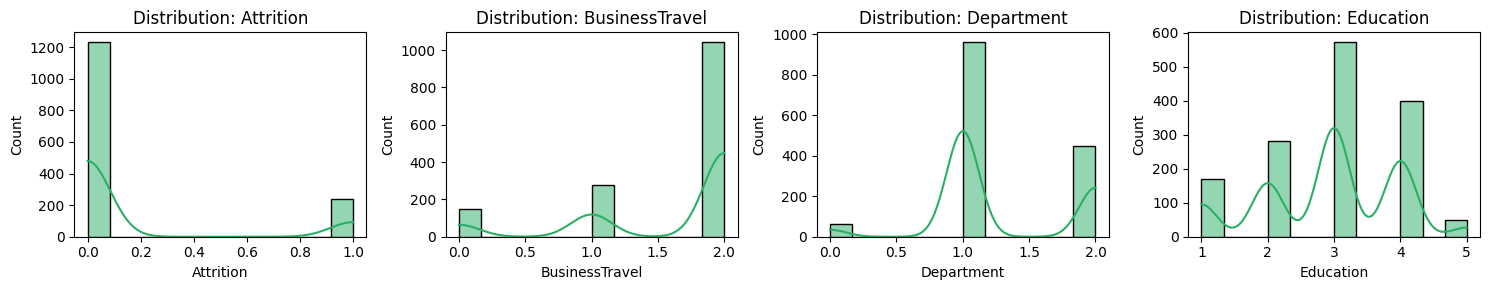

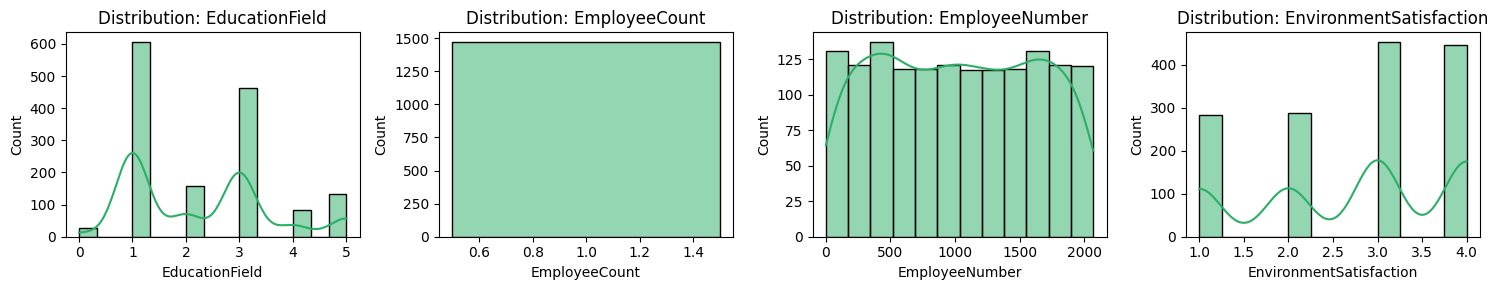

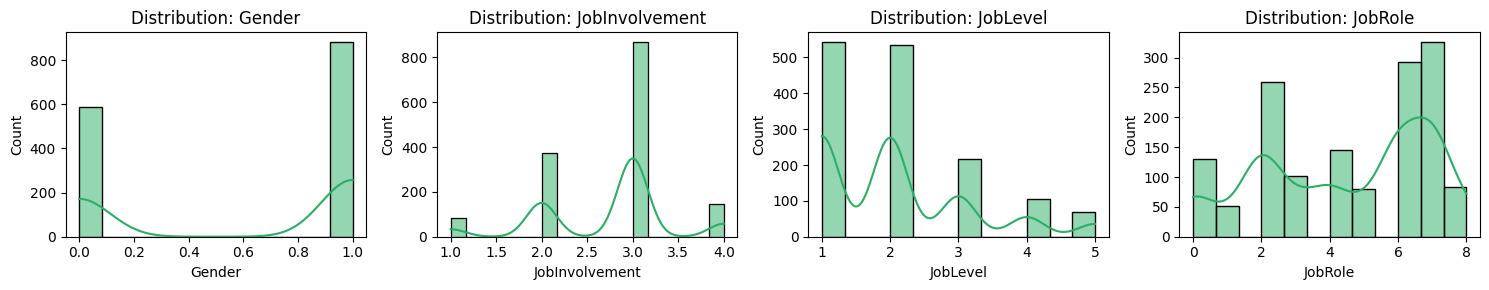

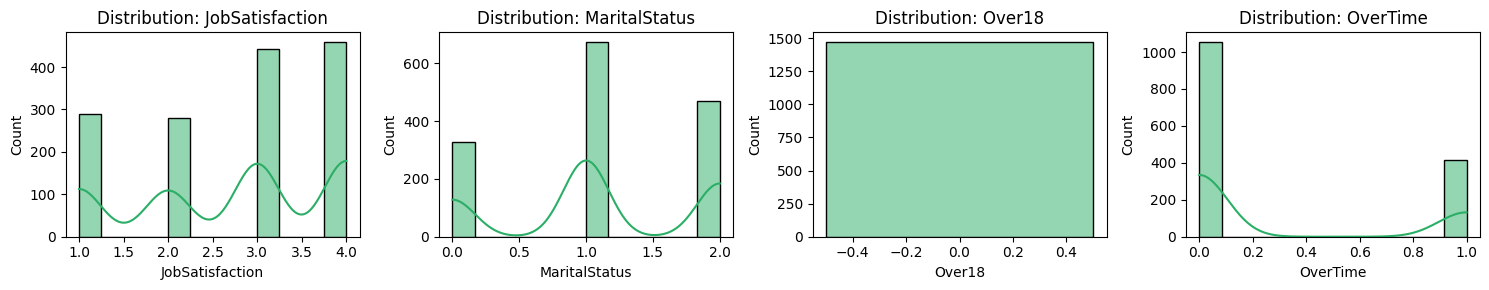

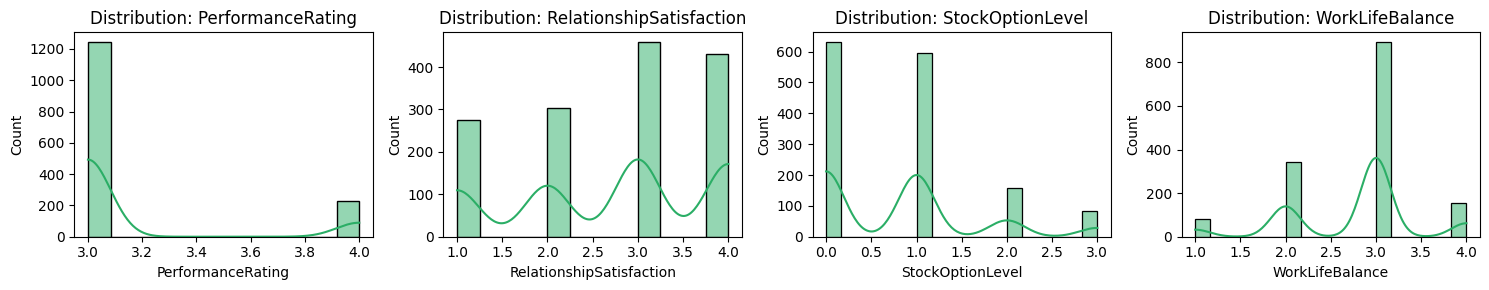

In [ ]:
cols = 4

rows = len(categorical_features) // cols + (len(categorical_features) % cols > 0)

print('Plotting Distributions')


for i in range(rows):
    fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(15, 3))


    for a, j in enumerate(categorical_features[i * cols : (i * cols) + cols]):
        sns.histplot(df1[j], kde=True, kde_kws={'bw_adjust': 1}, color=colors[0], ax=ax[a])
        ax[a].set_title(f'Distribution: {j}')

    plt.tight_layout()
    plt.show()


In [ ]:
df1.drop(columns = ['EmployeeCount', 'EmployeeNumber', 'Over18'], inplace = True)
categorical_features.remove('EmployeeCount'); categorical_features.remove('EmployeeNumber')
categorical_features.remove('Over18'); categorical_features.remove('Attrition')

In [ ]:
df1.drop(columns = ['StandardHours'], inplace = True)
discrete_features.remove('StandardHours')

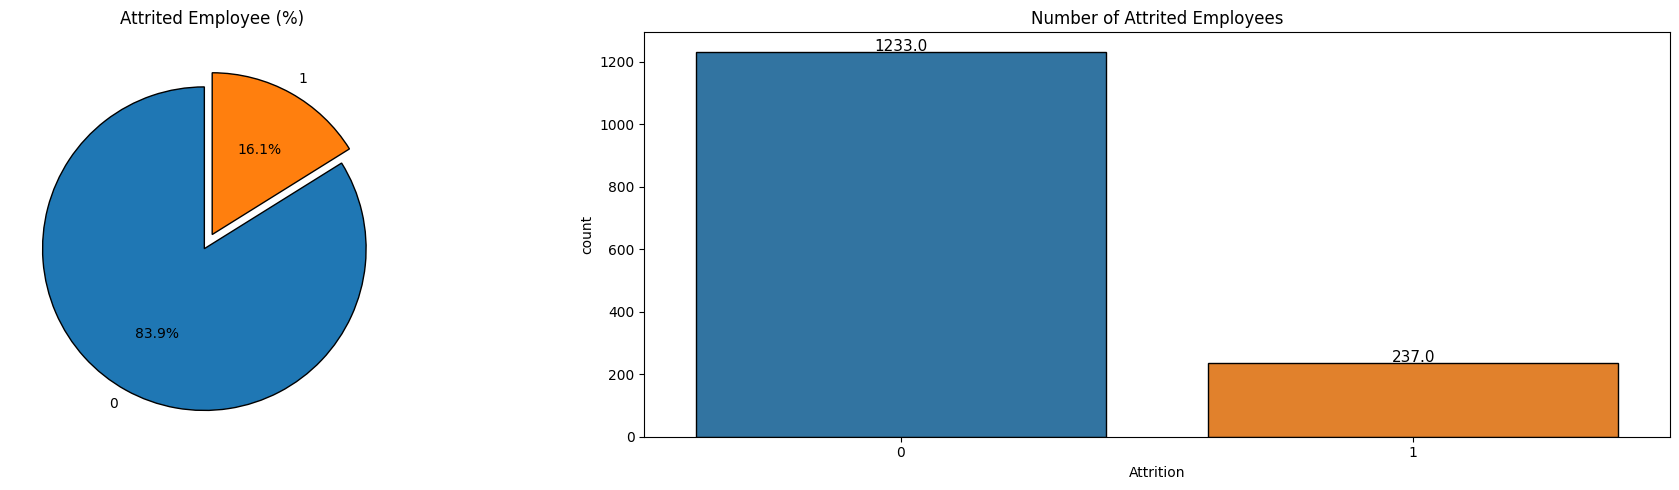

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#1f77b4', '#ff7f0e']

l = list(df1['Attrition'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))


ax[0].pie(
    circle,
    labels=[str(j) for j in sorted(df1['Attrition'].unique())],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0),
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
ax[0].set_title('Attrited Employee (%)')


sns.countplot(x='Attrition', data=df1, palette=colors, edgecolor='black', ax=ax[1])

for rect in ax[1].patches:
    ax[1].text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
               horizontalalignment='center', fontsize=11)


ax[1].set_xticklabels([str(j) for j in sorted(df1['Attrition'].unique())])
ax[1].set_title('Number of Attrited Employees')

plt.tight_layout()
plt.show()



In [ ]:
l1 = ['Age', 'Gender','MaritalStatus', 'Education',
      'DistanceFromHome', 'TotalWorkingYears', 'NumCompaniesWorked']

l2 = ['EducationField', 'Department', 'JobLevel', 'JobRole',
      'JobInvolvement', 'OverTime', 'JobSatisfaction']

l3 = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
      'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'WorkLifeBalance']

l4 = ['PercentSalaryHike', 'StockOptionLevel', 'BusinessTravel',
      'PerformanceRating', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']
l5 = ['MonthlyIncome', 'HourlyRate', 'DailyRate', 'MonthlyRate']

df2 = pd.DataFrame()
df2['Attrition'] = df1['Attrition']

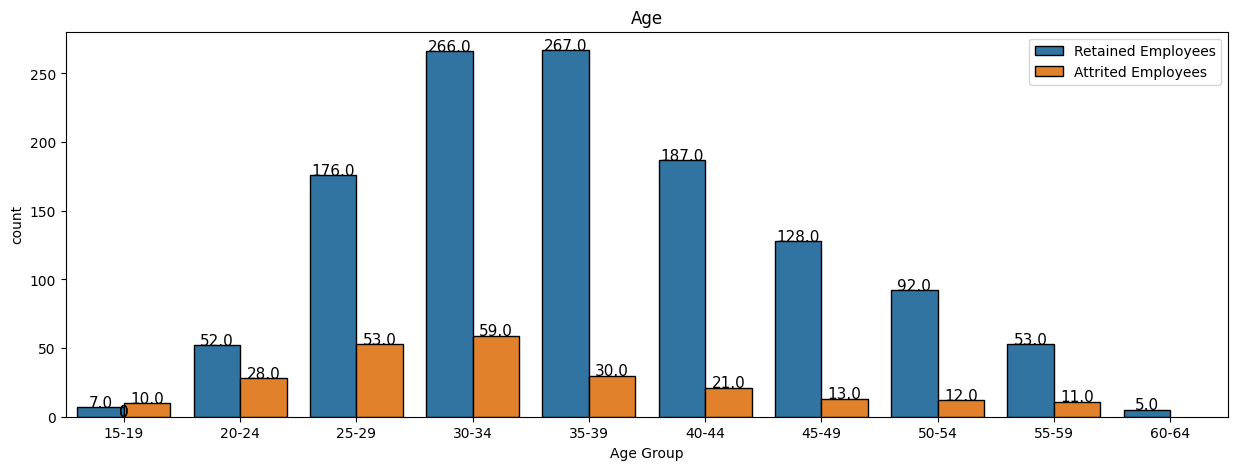

In [ ]:
colors = ['#1f77b4', '#ff7f0e']

df2['Age_Group'] = [int(i / 5) for i in df1['Age']]

plt.figure(figsize=(15, 5))
ax = sns.countplot(x='Age_Group', data=df2, hue='Attrition', palette=colors, edgecolor='black')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(),
            horizontalalignment='center', fontsize=11)

age_labels = [f"{i*5}-{i*5+4}" for i in sorted(df2['Age_Group'].unique())]
ax.set_xticklabels(age_labels)

plt.legend(['Retained Employees', 'Attrited Employees'], loc='upper right')
plt.title('Age')
plt.xlabel('Age Group')
plt.show()


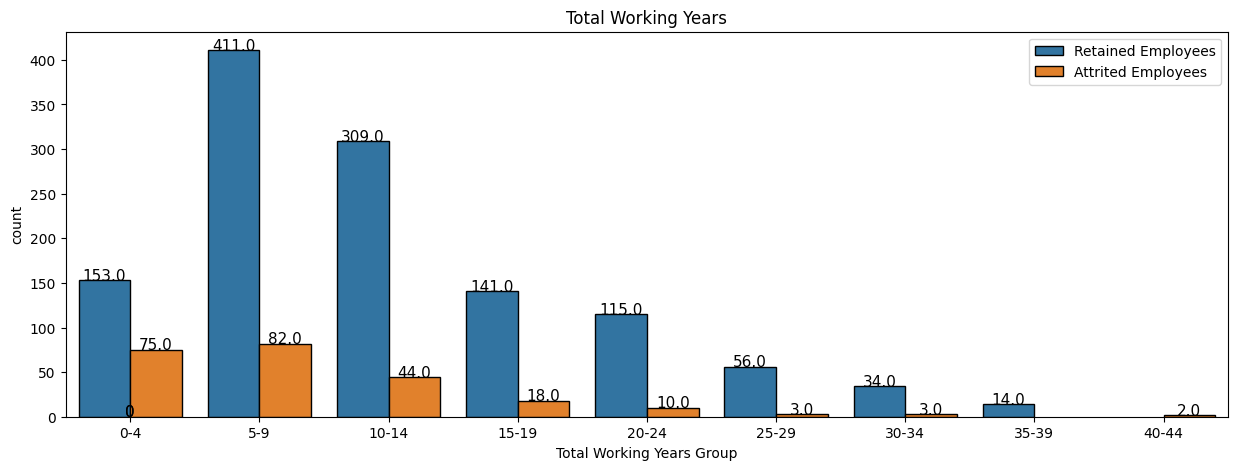

In [ ]:
colors = ['#1f77b4', '#ff7f0e']

df2['TotalWorkingYears_Group'] = [int(i / 5) for i in df1['TotalWorkingYears']]

plt.figure(figsize=(15, 5))
ax = sns.countplot(x='TotalWorkingYears_Group', data=df2, hue='Attrition', palette=colors, edgecolor='black')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(),
            horizontalalignment='center', fontsize=11)

work_years_labels = [f"{i*5}-{i*5+4}" for i in sorted(df2['TotalWorkingYears_Group'].unique())]
ax.set_xticklabels(work_years_labels)

plt.legend(['Retained Employees', 'Attrited Employees'], loc='upper right')
plt.title('Total Working Years')
plt.xlabel('Total Working Years Group')
plt.show()


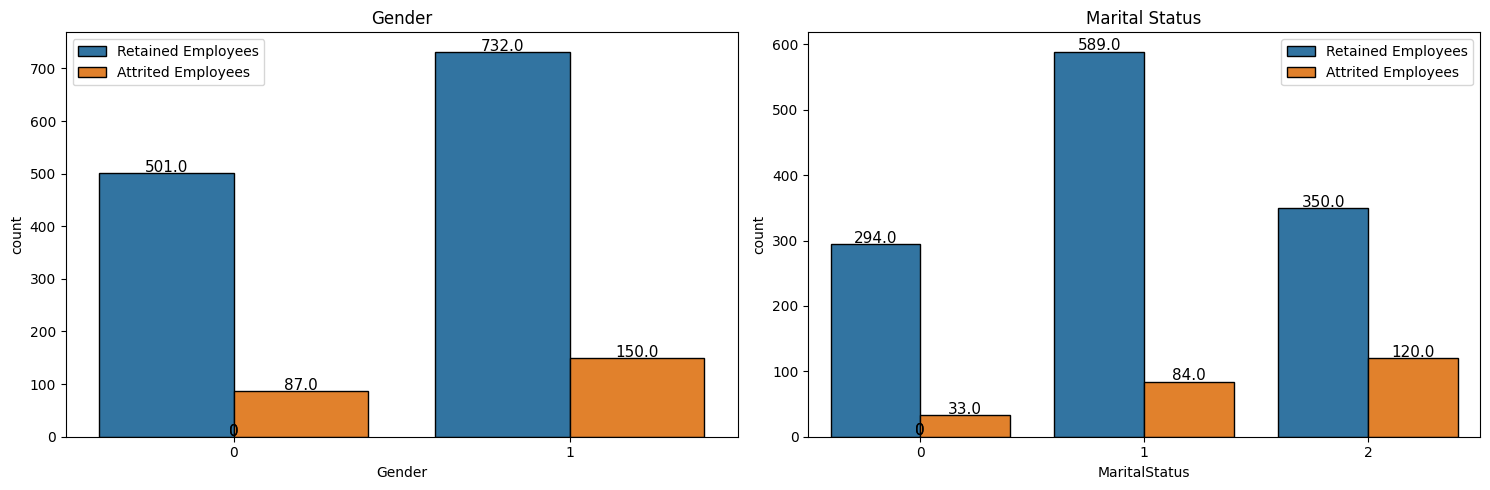

In [ ]:

colors = ['#1f77b4', '#ff7f0e']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax = sns.countplot(x='Gender', data=df1, hue='Attrition', palette=colors, edgecolor='black', ax=axes[0])
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
axes[0].legend(['Retained Employees', 'Attrited Employees'])
axes[0].set_title('Gender')

ax = sns.countplot(x='MaritalStatus', data=df1, hue='Attrition', palette=colors, edgecolor='black', ax=axes[1])
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
axes[1].legend(['Retained Employees', 'Attrited Employees'])
axes[1].set_title('Marital Status')

plt.tight_layout()
plt.show()


# Feature Engineering

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
cols = list(df1.columns)
cols.remove('Attrition')

over = SMOTE(sampling_strategy = 0.85)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.loc[:,cols]
t1 = df1.loc[:,'Attrition']

steps = [('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({1: 1048, 0: 1233})

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)

In [ ]:
x_train_test = x_train.copy(deep = True)
x_train_test['Attrition'] = y_train

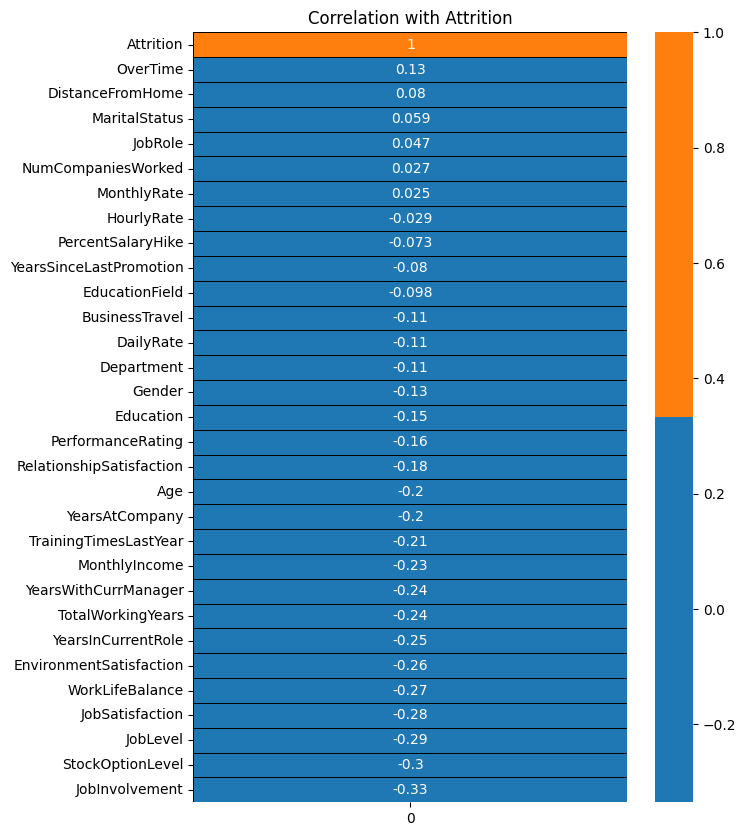

In [ ]:

correlation = x_train_test.corrwith(x_train_test['Attrition'])

correlation_sorted = correlation.sort_values(ascending=False)

correlation_frame = correlation_sorted.to_frame().rename(columns={'Attrition': 'Correlation'})

plt.figure(figsize=(7, 10))
sns.heatmap(correlation_frame, annot=True, cmap=colors, linewidths=0.4, linecolor='black')

plt.title('Correlation with Attrition')
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

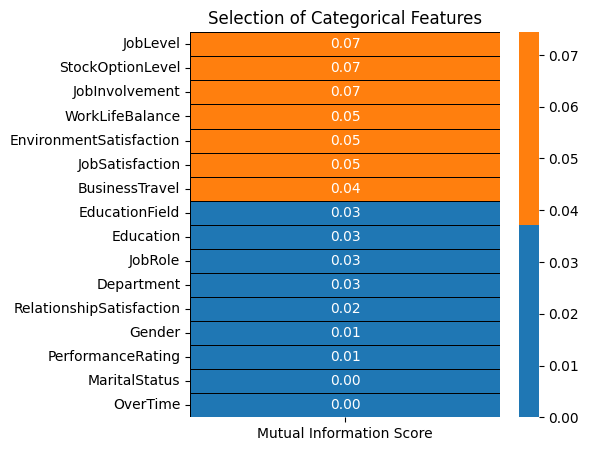

In [ ]:
categorical_features_data = x_train[categorical_features]
target_data = y_train.to_frame()

selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector_fit = selector.fit(categorical_features_data, target_data)

mutual_info_scores = pd.DataFrame({
    'Mutual Information Score': selector_fit.scores_
}, index=categorical_features_data.columns)


sorted_scores = mutual_info_scores.sort_values(by='Mutual Information Score', ascending=False)

plt.figure(figsize=(5, 5))
sns.heatmap(sorted_scores, annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')

plt.title('Selection of Categorical Features')
plt.show()


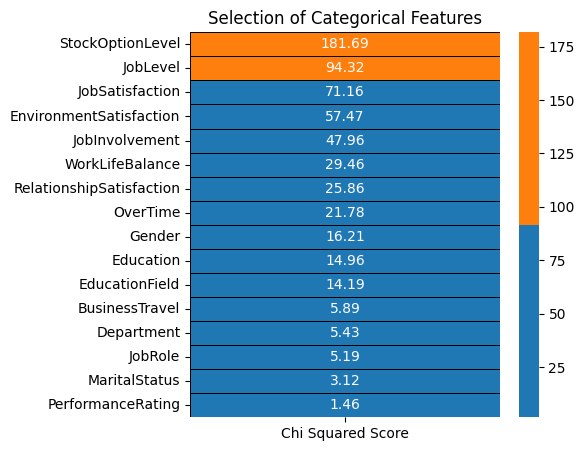

In [ ]:
categorical_features_data = x_train[categorical_features]
target_data = y_train.to_frame()

selector = SelectKBest(score_func=chi2, k='all')
selector_fit = selector.fit(categorical_features_data, target_data)

chi_squared_scores = pd.DataFrame({
    'Chi Squared Score': selector_fit.scores_
}, index=categorical_features_data.columns)

sorted_scores = chi_squared_scores.sort_values(by='Chi Squared Score', ascending=False)

plt.figure(figsize=(5, 5))
sns.heatmap(sorted_scores, annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')

plt.title('Selection of Categorical Features')
plt.show()


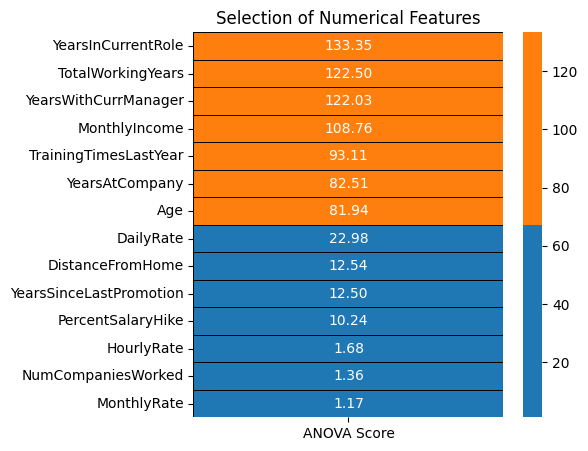

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

discrete_features_data = x_train[discrete_features]
target_data = y_train.to_frame()


anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_fit = anova_selector.fit(discrete_features_data, target_data)


anova_scores = pd.DataFrame({
    'ANOVA Score': anova_fit.scores_
}, index=discrete_features_data.columns)

sorted_anova_scores = anova_scores.sort_values(by='ANOVA Score', ascending=False)

plt.figure(figsize=(5, 5))
sns.heatmap(sorted_anova_scores, annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')

plt.title('Selection of Numerical Features')
plt.show()


In [ ]:
x_train = x_train.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField',
                                  'BusinessTravel', 'MaritalStatus' ,'Gender'])

x_test = x_test.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField',
                                  'BusinessTravel', 'MaritalStatus' ,'Gender'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
ss = StandardScaler()

norm_cols = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
             'YearsInCurrentRole', 'YearsWithCurrManager']
std_cols = ['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
            'JobLevel', 'JobSatisfaction', 'OverTime', 'RelationshipSatisfaction',
            'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
x_train[norm_cols] = mms.fit_transform(x_train[norm_cols])
x_test[norm_cols] = mms.transform(x_test[norm_cols])


x_train[std_cols] = ss.fit_transform(x_train[std_cols])
x_test[std_cols] = ss.transform(x_test[std_cols])


# Modelleme

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def model(classifier, x_train, y_train, x_test, y_test):

    classifier.fit(x_train, y_train)

    prediction = classifier.predict(x_test)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_score = cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()
    print("Cross Validation Score:", '{0:.2%}'.format(cv_score))


    roc_score = roc_auc_score(y_test, prediction)
    print("ROC_AUC Score:", '{0:.2%}'.format(roc_score))


    y_score = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {auc(fpr, tpr):.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC AUC Plot")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

def model_evaluation(classifier, x_test, y_test):

    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=labels, cmap="Blues", fmt='', cbar=False)
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()


    print("\nClassification Report:")
    print(classification_report(y_test, classifier.predict(x_test)))


## XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score: 91.73%
ROC_AUC Score: 89.22%


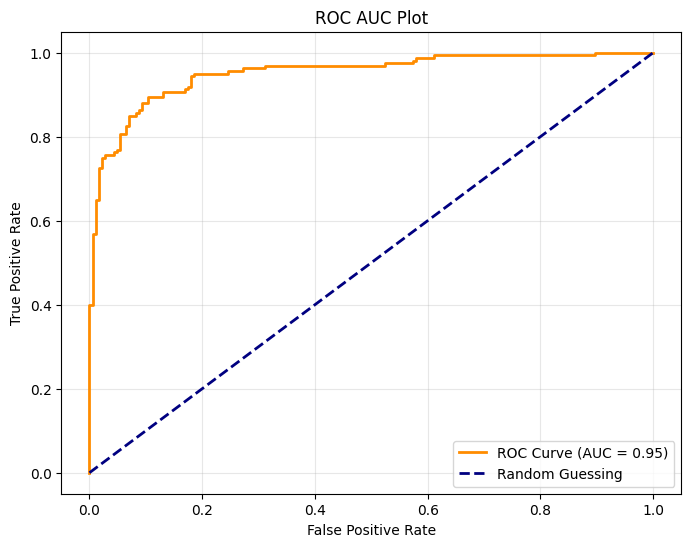

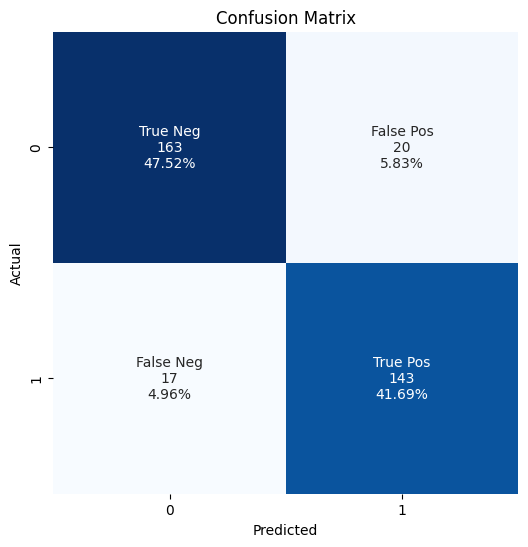


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       183
           1       0.88      0.89      0.89       160

    accuracy                           0.89       343
   macro avg       0.89      0.89      0.89       343
weighted avg       0.89      0.89      0.89       343



In [ ]:
model(classifier_xgb,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_xgb,x_test.values,y_test.values)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

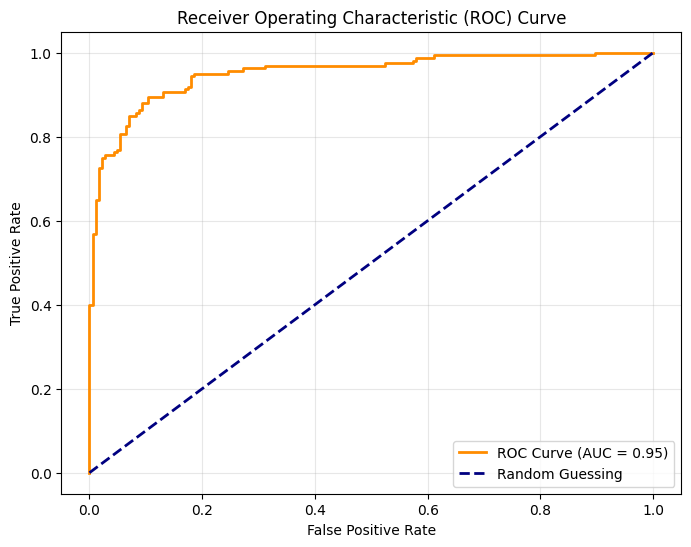

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test):
    y_score = model.predict_proba(X_test)[:, 1]


    fpr, tpr, thresholds = roc_curve(y_test, y_score)


    roc_auc = auc(fpr, tpr)


    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

plot_roc_curve(classifier_xgb, x_test.values, y_test.values)

## LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

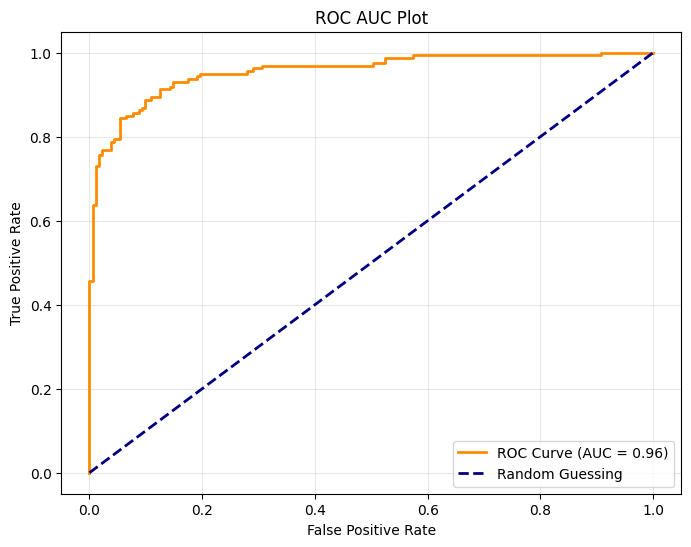

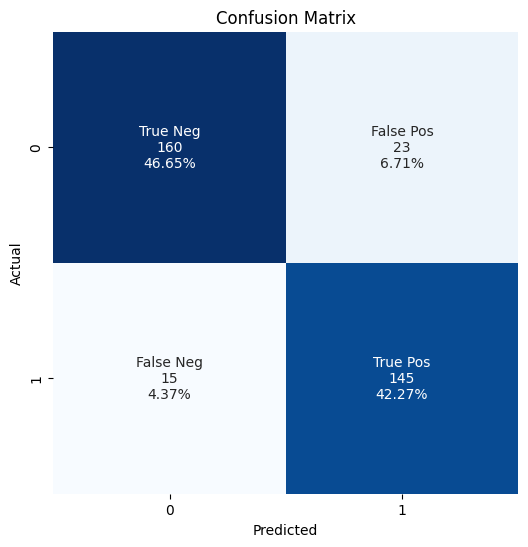


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       183
           1       0.86      0.91      0.88       160

    accuracy                           0.89       343
   macro avg       0.89      0.89      0.89       343
weighted avg       0.89      0.89      0.89       343



In [ ]:
model(classifier_lgbm,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_lgbm,x_test.values,y_test.values)

## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)


Cross Validation Score: 79.33%
ROC_AUC Score: 79.31%


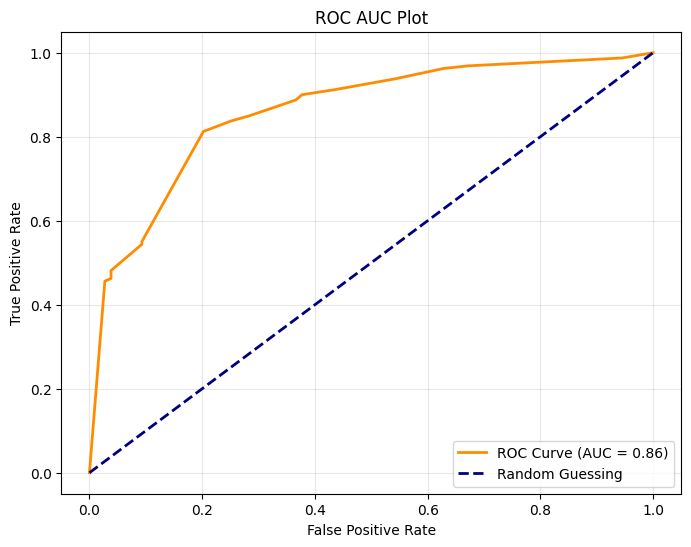

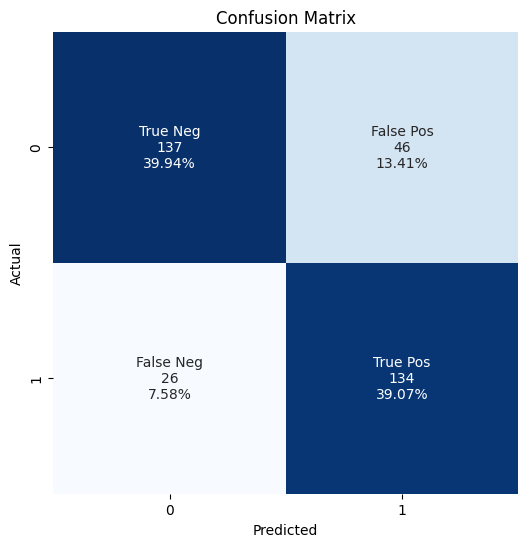


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       183
           1       0.74      0.84      0.79       160

    accuracy                           0.79       343
   macro avg       0.79      0.79      0.79       343
weighted avg       0.80      0.79      0.79       343



In [ ]:
model(classifier_dt,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_dt,x_test.values,y_test.values)

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)


Cross Validation Score: 87.23%
ROC_AUC Score: 83.83%


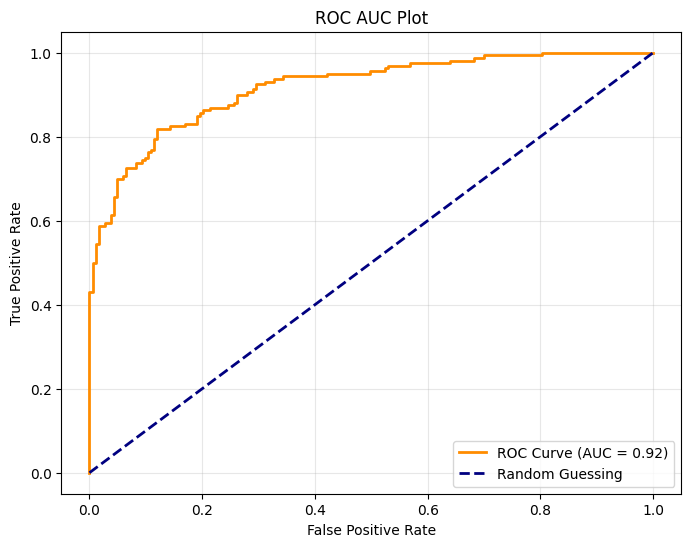

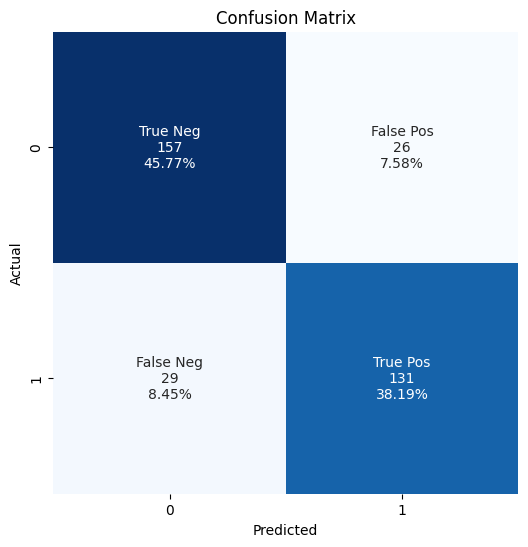


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       183
           1       0.83      0.82      0.83       160

    accuracy                           0.84       343
   macro avg       0.84      0.84      0.84       343
weighted avg       0.84      0.84      0.84       343



In [ ]:
model(classifier_rf,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_rf,x_test.values,y_test.values)